<h1> Lab 3: Reducing Crime</h1>

<h4> Team: </h4>

* <em> Yixun Zhang </em>
* <em> Hsuanyi Cheng</em>
* <em> Shyamkarthik Rameshbabu </em> 

# Introduction

Crime rate is one of our nation's most critical issues. Our study believes that statistical analysis can be used to  provide meaningful understanding of a city, state, or nation's status on crime and the various factors that impact crime. From these findings we hope to suggest actionable and effective public policies at various levels of government. 

The goal of this report is to answer the question: How do factors of the population affect crime rate? 

Given the data set presented, our scope to answer this question beings with providing data-driven insights into key determinants of crime in the state of North Carolina in 1987. Using statistical techniques, we will analyze the data set, discuss our assumptions, and present recommendations to form policies at the county or regional level. 

This research study utilizes data from C. Cornwell and W. Trumball (1994), “Estimating the Economic Model of Crime with Panel Data,” Review of Economics and Statistics. We are 3 linear regression models that we have built to emphasize key facets of data, and to highlight which factors have an significant effect on estimating crime rate. 

Model 1 is a rudementary solution that uses explanatory variables to displays a positive correlation with crime rate. It will be discussed in greater detail below, but to preface, here we show that high population density and high tax revenue in fact are correlated with higher crime rates. 

In Model 2, a few more explanatory variables are added to diversify our model. Specifically probability of arrest and probability of convicted crime are taken into consideration and show a strong negatively linear relationship with crime rate. 

Finally in Model 3, we develop a model in a "smorgasbord" fashion. We include nearly all the explanatory variables that we have present in our data set. The goal here is to push our models boundaries with a potential overfitting of data. Though this may seem slightly excessive, we want to be able to compare this to the other models and consider statistical significance as well as practical significance on how successfully we can measure and capture the behavior of crime rate while minimizing the amount of factors we need to consider.


We want to remphasize that the variables mentioned above respective to each model will be discussed in greater detail below. Though we may not be able to generalize findings from North Carolina in 1987 to the entirity of the United States, by the end of this report we hope to explain crime rate within our scope and suggest to the local government necessary policies or decisions they can make to address issues and concerns with crime.

In [1]:
options(warn=-1)

In [ ]:
#Libraries
library(reshape2)
library(ggplot2)
library(gridExtra)
library(lmtest)
library(sandwich)
library(stargazer)
library(car)
library(e1071)
library(effectsize)

## Exploratory Data Analysis (EDA)

The dataset we will be using comes from the year 1987, except for the variable "percent minority" data point, which was taken from 1980. We are only provided a single cross-section of data, the original study was based on a multi-year panel. This study in North Carolina was done using panel data methods and instrumental variables, to control for some types of omitted variables, we will address the implicit bias that comes into play later on. The data is given by county.

In [3]:
#Data Import 
crime_data = read.csv('crime_v2.csv')
head(crime_data)

#Data Overview
dim(crime_data)
class(crime_data)
str(crime_data)


county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


[1] 97 25

[1] "data.frame"

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

## Data Cleaning

Before we start the model building process, we want to properly explore the provided dataset. Initially, the dataset has 97 rows and 27 variables. There are 6 rows that are excluded due to null value across all variables. Further more, every county is represented once except county 193 shown twice. Overall, in the end, we are working in the dataset with 90 rows and 27 variables. Overall, we prepare the data into the appropriate format for our analysis. The cleaning process is provided below.

In [4]:
#Data Cleaning
#Cleaning NA rows from the data
crime_data = crime_data[complete.cases(crime_data), ]


options(digits=9)
#Converting prbconv column to numeric instead of factor  + making it a probability
crime_data$prbconv <- sapply(crime_data$prbconv,as.character)
crime_data$prbconv <- sapply(crime_data$prbconv,as.numeric)

#Every county is represented once, EXCEPT FOR COUNTY 193 shown twice!! All counties are all ODD # counties
paste("List of counties in data ", length(crime_data$county))
paste("Unique # of counties ", length(unique(crime_data$county)))
paste("County repeated: ", crime_data[duplicated(crime_data$county),"county"])


#Showing Duplicate Row
crime_data[crime_data$county == 193,]

#Get rid of one duplicate row
crime_data = crime_data[!duplicated(crime_data),]
dim(crime_data)

print("County 193 removed")
paste("total number of row in dataset : ", nrow(crime_data))

[1] "List of counties in data  91"

[1] "Unique # of counties  90"

[1] "County repeated:  193"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266054988,0.588859022,0.423422992,5.86000013,0.00117887,0.81382978,28.5178261,...,480.194824,268.383606,365.019592,295.93515,295.630005,468.26001,337.880005,348.73999,0.110501572,0.07819394
89,193,87,0.0235277,0.266054988,0.588859022,0.423422992,5.86000013,0.00117887,0.81382978,28.5178261,...,480.194824,268.383606,365.019592,295.93515,295.630005,468.26001,337.880005,348.73999,0.110501572,0.07819394


[1] 90 25

[1] "County 193 removed"


[1] "total number of row in dataset :  90"

### Data Summary

In [5]:
# Get summaries of all the variables in our dataset

crime_summary = data.frame(t(mapply(summary, crime_data))) 

crime_summary$min = round(crime_summary$Min.,5) 
crime_summary$quad1 = round(crime_summary$X1st.Qu.,5) 
crime_summary$mean = round(crime_summary$Mean,5) 
crime_summary$quad3 = round(crime_summary$X3rd.Qu,5) 
crime_summary$max = round(crime_summary$Max.,5) 

keep_cols = c("min","quad1","mean","quad3", "max")
crime_summary = crime_summary[keep_cols]
crime_summary


,min,quad1,mean,quad3,max
county,1.00000,51.50000,100.60000,150.50000,197.00000
year,87.00000,87.00000,87.00000,87.00000,87.00000
crmrte,0.00553,0.02060,0.03351,0.04025,0.09897
prbarr,0.09277,0.20495,0.29524,0.34487,1.09091
prbconv,0.06838,0.34422,0.55086,0.58513,2.12121
prbpris,0.15000,0.36422,0.41063,0.45756,0.60000
avgsen,5.38000,7.37500,9.68889,11.46500,20.70000
polpc,0.00075,0.00124,0.00171,0.00189,0.00905
density,0.00002,0.54718,1.43567,1.56926,8.82765
taxpc,25.69287,30.73462,38.16103,41.01009,119.76145


### Region Spread

Counties fell into various regions based on two boolean column, west and central. Analyzing these columns we noticed that some counties were logged under both regions or as neither, possible misclassification if they are both geographically adjacent to each other or a error in the data. We will treat these counties as "unknown" because the classificaton is unsure. We have added a column called "region" to our data that explicitly classifies a county as "west","central", or "unknown".

In this section we do not include the "urban" boolean column, we have interpretted being "urban" as a characteristic of a city/town/area, it is not a directional geographic data point.

In [6]:
region_helper <-  function (data_row) {
    region = "unknown"
    if ((data_row[1] == 1) && (data_row[2] != 1)) {
        region = "west"
    }
    if ((data_row[1] != 1) && (data_row[2] == 1)) {
        region = "central"
    }
    return (region)
}


# Add Region Column
crime_data$region <- apply(crime_data[,c("west","central")], 1, function(x) region_helper(x))

## Outlier Analysis and Data Transformations

Using the summary of variables above as an initial glimpse into the data, we continue analysis on variables that had descriptive statistics of interest. The following are potential variables that could be used in our models. In addition we want to gain an understanding of potential outliers that could also be present. In some scenarios we see data points that looks like an outlier but actually have very low influence. The opposite also exists, with outliers  that have a heavy influence.

### Variables:  
* <em>prbarr<em> - probability of arrest
* <em>prbconv<em> - probability of conviction
    

We see some unexpected behavior in that the probability of arrest (prbarr) or the probability of conviction (prbconv)  are greater than **1.0**, implying that more arrests were carried out than offenses recorded, or that there were more convictions than the number of people arrested. So we want to see the spread on this.

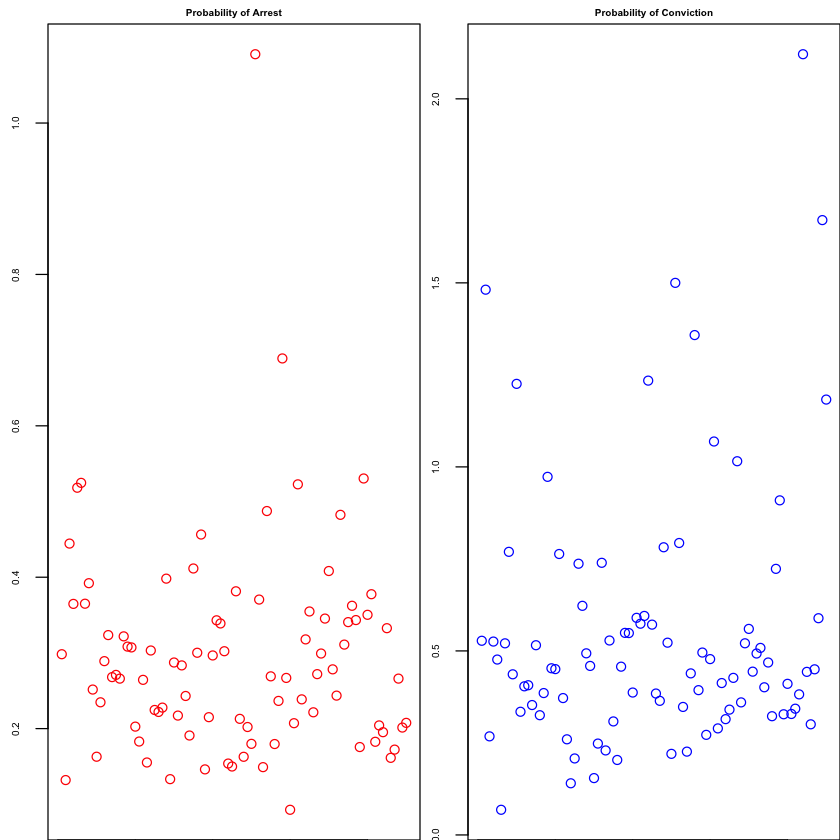

In [7]:
par(mfrow=c(1,2), mar=c(0,2,1,0))

plot(crime_data$prbarr,
        col = "red", 
        cex.main = 0.5,
        cex.axis = 0.5,
        cex.lab = 0.5, main = "Probability of Arrest") 


plot(crime_data$prbconv,
        col = "blue", 
        cex.main = 0.5, 
        cex.axis = 0.5, 
        cex.lab = 0.5,
        main = "Probability of Conviction")

In [8]:
# Prob of Arrest > 1.0
paste("County (with Prob Arrest > 1)   : ", crime_data[crime_data$prbarr > 1,]$county)

[1] "County (with Prob Arrest > 1)   :  115"

Given that county 115 here has a probability of arrest greater than 1.0, we can draw some real life meaning from this.
The process of committing an offense, arresting the individual, and convicting the individual are all separate events, that may or may not happen all in one day, week or even year! There is a possible "edge case" in that if a crime was committed i.e. in 1986, but the individual was arrested in 1987 there is a descrepency there in terms of how we log this outcome in our data. In addition the time it takes to find and arrest a perpetrator or even go through the judicial process could be very lengthy. This type of reasoning can explain why we see values that are greater than 1.0 in the 'prbarr' and 'prbconv' columns of our data.


### Variables:  
* <em>density<em> - people per sq. mile
    
According to the table we presented, these values seemed to be very low. 
    
    
**Mean: 1.43567	Max: 8.82765**

Doing some research, according to the population data collected from https://worldpopulationreview.com/states/north-carolina-population/ we can see that in 1987 the population was inbetween 5.88 and 6.63 million people, so for argument's purpse we will take the average population to be 6.255 million in 1987. North Carolina’s state area is listed as 53,819 square miles, therefore calculating the population density of North Carolina in 1987 results to approximately **116.6 people per square mile**. It should be noted that the unit for the 'density' variable is hundreds of people per square mile. This is relevant in interpretting the meaning of the beta coefficients in our linear models.

### Variables:  
* <em>wser<em> - average wkly wge, service industry
    
For the variable **wser** there seems to be a max value much greater than the other "weekly wage" variables in our data. Given the outlier is on a different level altogether, this is someting to investigate.   

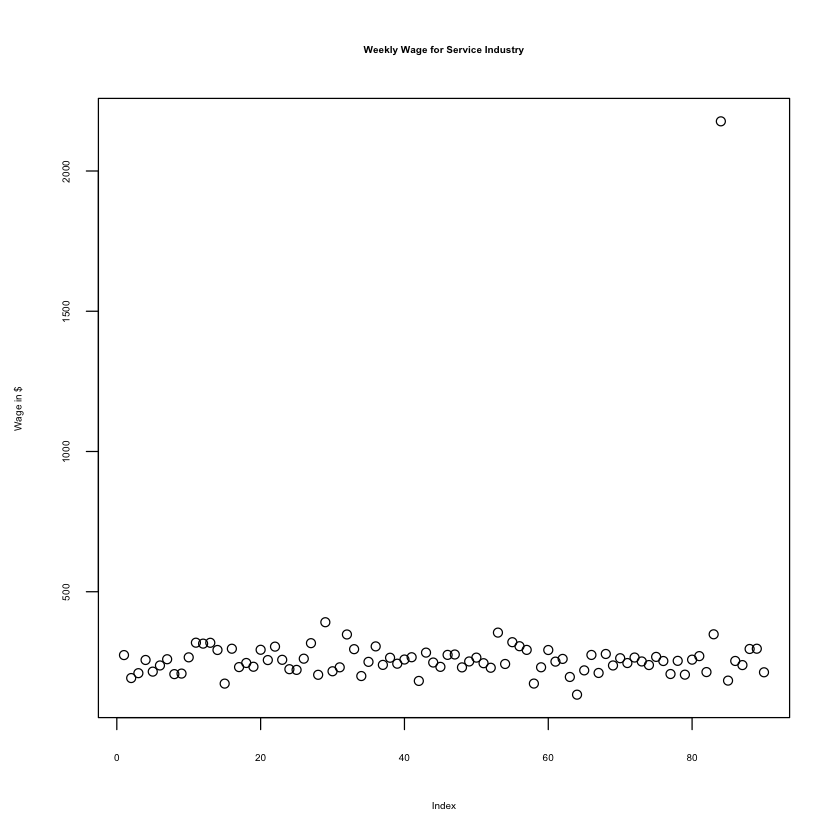

In [9]:
plot(crime_data$wser, cex.main = 0.5, cex.lab = 0.5, cex.axis = 0.5,
        main = "Weekly Wage for Service Industry",
        ylab = "Wage in $")

In [10]:
weekly_wage_vars = c("wcon","wtuc", "wtrd","wfir","wser", "wmfg","wfed","wsta","wloc")
crime_summary[weekly_wage_vars, keep_cols]

,min,quad1,mean,quad3,max
wcon,193.64316,250.75436,285.35324,314.97933,436.76663
wtuc,187.61726,374.33086,410.90654,440.67867,613.22607
wtrd,154.20900,190.70959,210.92145,224.28238,354.67612
wfir,170.94017,285.56036,321.62130,342.62790,509.46552
wser,133.04306,229.33846,275.33787,277.65005,2177.06812
wmfg,157.41000,288.59750,336.03267,359.89500,646.84998
wfed,326.10001,398.78499,442.61889,478.25500,597.95001
wsta,258.32999,329.27250,357.74022,383.15500,499.59000
wloc,239.17000,297.22750,312.28011,328.77500,388.09000


In [11]:
paste("The outlier value of $2177.06812 is approximately 8 times the average wser value which is: ", mean(crime_data$wser))


[1] "The outlier value of $2177.06812 is approximately 8 times the average wser value which is:  275.337867728889"

As shown in the plot and table above for various weekly wages the (min , mean, max) across industries is much lower than the outlier value that we see. Even after doing background research on the blue collar wage situation of the service industry in N.C. (1987), many key details are missing. i.e. How many employees does each industry have? How confident can we be in the data presented if only 10 employees for a given industry were surveyed? This data would help us understand the practical signficance for this data point. In addition the scope of these parameters is rather  unclear. i.e. The high wage outlier for the service industry, we do not know if the inidividual earning this wage worked in this county or simply lives here but works else where. We are unsure what data point is reprsented here, which in effect starts making it more difficult to confidently conclude reccommendations for policy. To our best understanding based on the data presented on average wages in N.C. and for the various industries including the service industry, we determine that the outlier data point misrepresents the population of North Carolina. Given that the rest of that county's data points are still reasonable and valid, to not lose the rest of that data we have chosen to impute the value of 'wser' for county 185 with its average wage value. We feel this is a reasonable solution in this scenario to ensure we are not throwing away an entire county's data without probable cause, rather replacing its outlier with a reasonable average wage for that industry.

In [12]:
# Prob of Arrest > 1.0
paste("County (wser > 2000)   : ", crime_data[crime_data$wser > 2000,]$county)

#Swapping out the outlier
swap_wser_val = mean(crime_data[crime_data$wser < 2000,]$wser)
crime_data[crime_data$county == 185, "wser"] <- swap_wser_val

[1] "County (wser > 2000)   :  185"

### Variables:  
* <em>polpc<em> - police per capita

When studying this variable, we noticed that the behavior of crime rate varied widely with the value of polce per capita in each region ("west","central","other").

In [13]:
# Here we are splitting the cleaned data set into 3 tables by the region
crime_data_west = crime_data[crime_data$region == "west",]
crime_data_central = crime_data[crime_data$region == "central",]
crime_data_unknown = crime_data[crime_data$region == "unknown",]

**Average Crime Rate by Region**

In [14]:
paste("West ", mean(crime_data_west$crmrte))
paste("Central ", mean(crime_data_central$crmrte))
paste("Unknown ", mean(crime_data_unknown$crmrte))

[1] "West  0.0205613523333333"

[1] "Central  0.0369962664848485"

[1] "Unknown  0.0378674442777778"

**Below we show various plots that show the relationship of police per capita and crime rate given region**

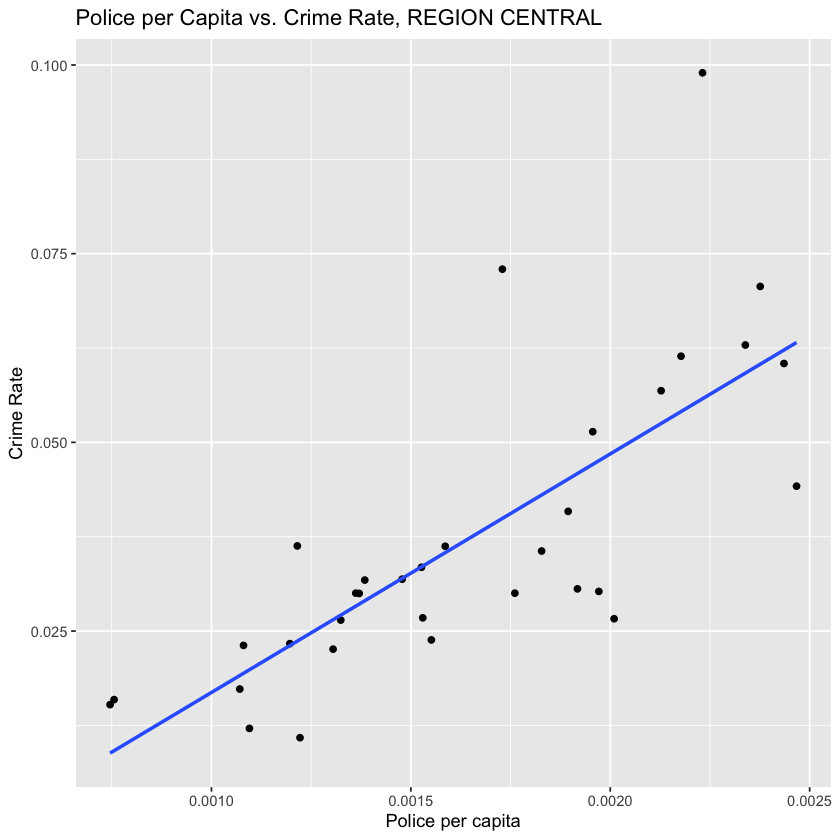

In [15]:
ggplot(crime_data_central, aes(polpc, crmrte)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    xlab("Police per capita") +
    ylab("Crime Rate") +
    ggtitle("Police per Capita vs. Crime Rate, REGION CENTRAL")

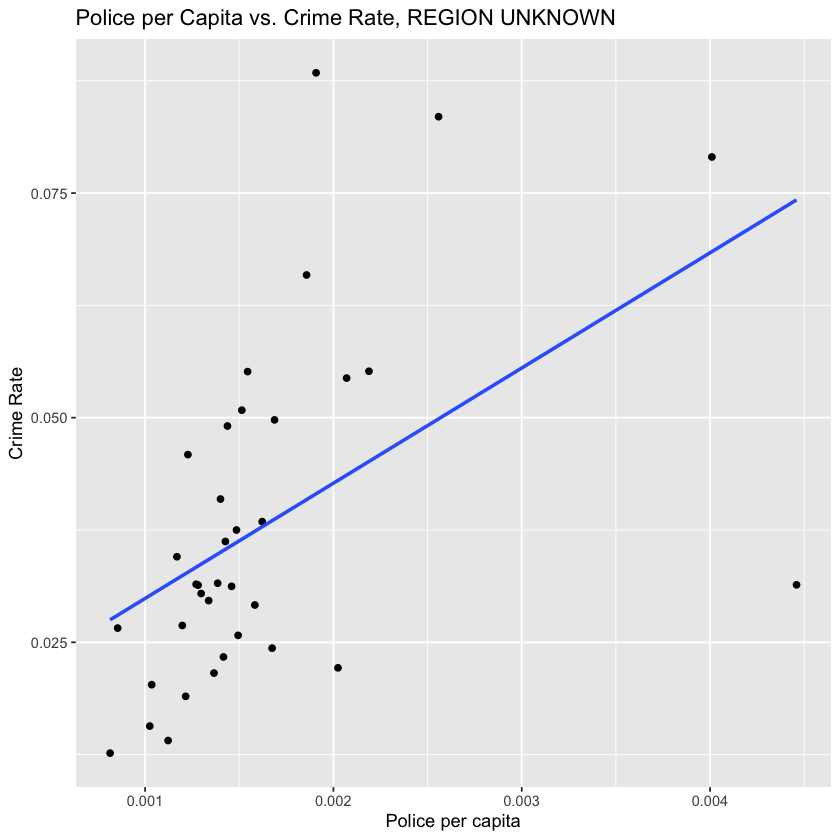

In [16]:
ggplot(crime_data_unknown, aes(polpc, crmrte)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    xlab("Police per capita") +
    ylab("Crime Rate") +
    ggtitle("Police per Capita vs. Crime Rate, REGION UNKNOWN")

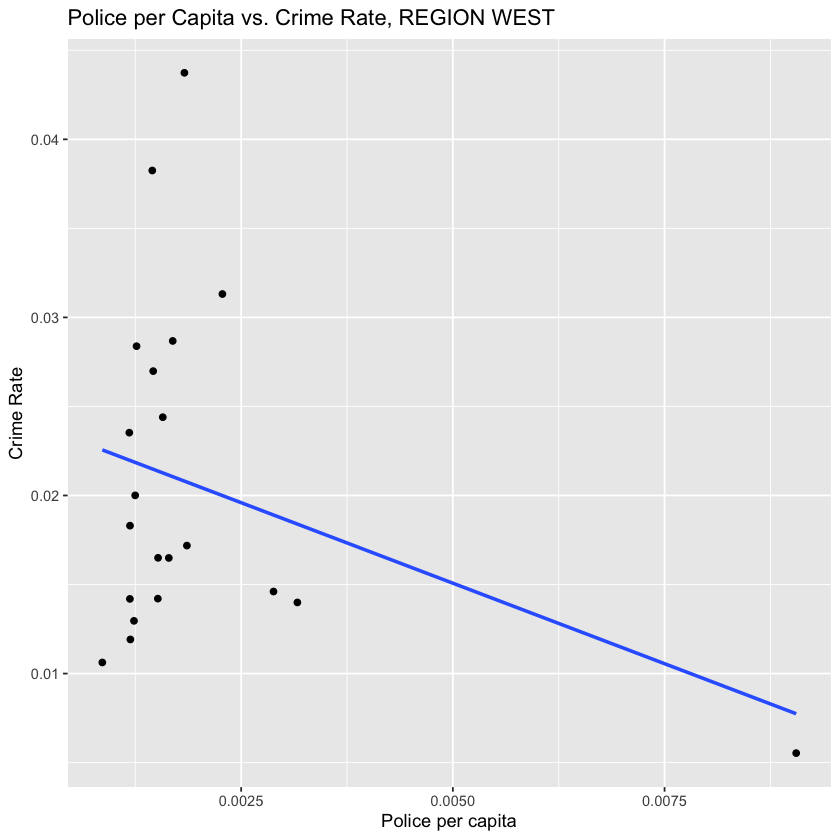

In [17]:
ggplot(crime_data_west, aes(polpc, crmrte)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    xlab("Police per capita") +
    ylab("Crime Rate") +
    ggtitle("Police per Capita vs. Crime Rate, REGION WEST")

We notice that in the **west** region, the polpc variable has a high negative correlation to "crmrte". It is notable that the scatter of the data varies widely by region. Specifically here we note that there is an outlying data point in the **west** region that has a high influence on the linear model that fits the data.


After doing some research on national police per capita, citing: https://www.governing.com/gov-data/safety-justice/police-officers-per-capita-rates-employment-for-city-departments.html


"In 2016 Washington, D.C., and Chicago recorded the highest tallies of officers per capita among big cities reporting data to the FBI."

District of Columbia: 0.00551
Chicago, Illinois: 0.00439

If the average police per capita for some of the most secure places in the nation is around 0.00495, looking at the data shown in our study it is fair to say that (0.00915) the data point shown for county 115 is an outlier.

The outlier has an incorrect influence on our model so we will be imputing its value, for the average "polpc" for the west region.

In [18]:
# Police per Capita > 0.005
paste("County (polpc > 0.005) : ", crime_data[crime_data$polpc > 0.005,]$county)
crime_data[crime_data$county == 115,]

#Swapping out the outlier
swap_polpc_val <- mean(crime_data[which(crime_data$region == "west" | crime_data$polpc < 0.005) , ]$polpc)
crime_data[crime_data$county == 115, "polpc"] <- swap_polpc_val


print("After Imputing the average polpc")
crime_data[crime_data$county == 115,]

[1] "County (polpc > 0.005) :  115"

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region
51,115,87,0.0055332,1.09090996,1.5,0.5,20.7000008,0.00905433,0.385809302,28.1931038,...,217.490845,342.465759,245.206085,448.420013,442.200012,340.390015,386.119995,0.100000001,0.072534949,west


[1] "After Imputing the average polpc"


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,region
51,115,87,0.0055332,1.09090996,1.5,0.5,20.7000008,0.00170797344,0.385809302,28.1931038,...,217.490845,342.465759,245.206085,448.420013,442.200012,340.390015,386.119995,0.100000001,0.072534949,west


**Below shows the relationship of "polpc" and "crmrte" in the west region after addressing the outlier.**

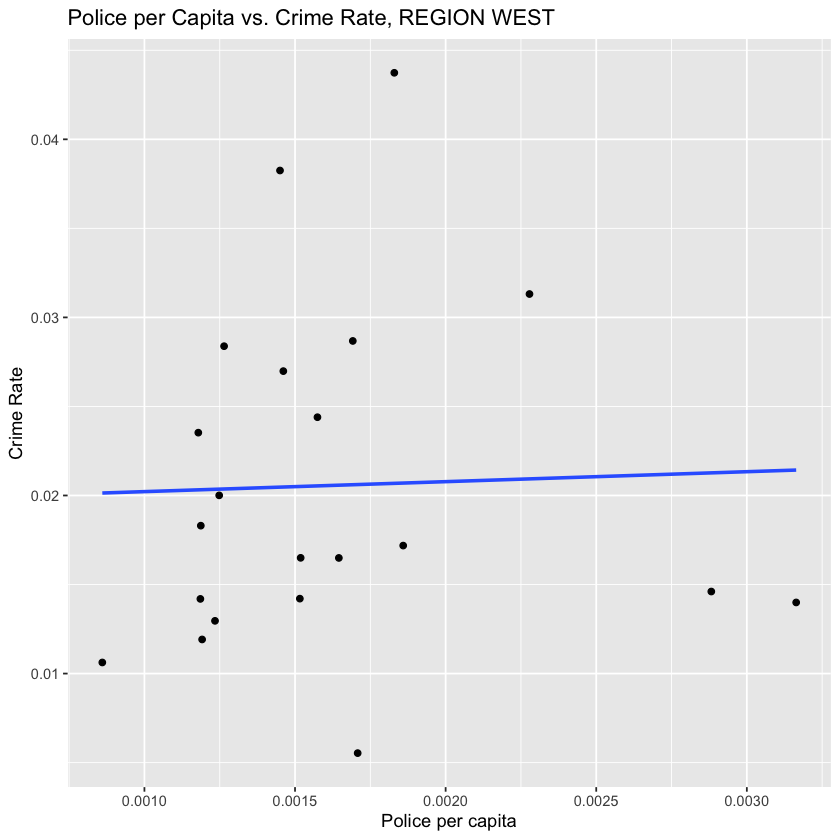

In [19]:
ggplot(crime_data[crime_data$region=="west",], aes(polpc, crmrte)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE) +
    xlab("Police per capita") +
    ylab("Crime Rate") +
    ggtitle("Police per Capita vs. Crime Rate, REGION WEST")

## Correlation Analysis - Heat Map

The outlier analysis and cleaning have been iterative processes with each section informing the other, below we present a correlation heat map to make it easy in visualizing and comparing all the explanatory variables at play. We have used knowledge gained from this diagram to make inferences as to the variables that will be most relevant in our models.

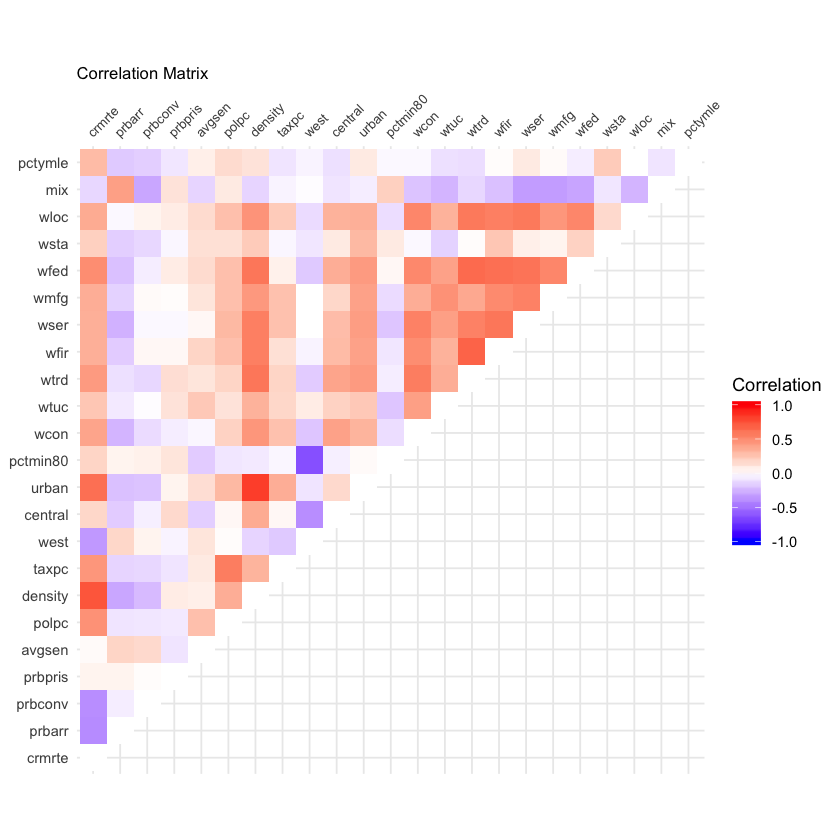

In [20]:
#Getting all the variables, except we don't need county or year

# Code reference for heat map: 
# http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization

#Helper Functions
# Get lower triangle of the correlation matrix
get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
}

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
}


#Preparing data
var_list = setdiff(names(crime_data),c('county', 'year','region'))
corr_matrix <- round(cor(crime_data[,var_list]),2) 
corr_matrix_upper_tri = get_upper_tri(corr_matrix)

#Reshaping the matrix for our needs
cor_mat_upper <- melt(corr_matrix_upper_tri, na.rm = TRUE) 
cor_mat_upper[cor_mat_upper$value == 1,]$value = 0


#Generating the Heatmap
ggplot(data = cor_mat_upper, aes(Var1, Var2, fill = value)) + geom_tile() +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                         midpoint = 0, limit = c(-1,1), space = "Lab", name = "Correlation") +
    theme_minimal() +
    scale_x_discrete(position = "top") +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 8, hjust = 0),
          axis.title.x=element_blank(), axis.title.y=element_blank(), plot.title = element_text(size = 10)) +
    coord_fixed() + ggtitle("Correlation Matrix")


### Heat Map Analysis:


* **density** has the highest positive correlation with **crmrte**. It is probably the most relevant variable to study and use in the models we will generate. Considering possible omitted variables that might arise here is key.

* **density** has a very strong correlation with the **urban** indicator. This is a logical correlation given that areas with urban development are usually metros and cities also with high density of people. Given we may use **density** as an explanatory variable we can say that information from the **urban** indicator will be represented in the model. To avoid multi-collinearity we will only include **density** in our final model

* **prbarr** and **prbconv** seem to have a negative correlation to crmrte. This can be interpreted such that areas with higher probability of arrest and probability to convict criminals are more efficiently policed and more secure. There is a lower a chance for someone committing a crime to get away with it in these areas, therefore the crime rate is lower.

* **west** has the highest negative correlation **pctmin80**. This suggests that there is low minority population in the west region. **west** also has a moderate negative correlation with **crmrte** which is saying that if a county is in the west region, that the crime rate tends to be lower.

*  Most **wage variables** seem to be positively correlated with each other. Therefore we have to be careful and avoid multi-collinearity when constructing our model if we were to use any of these as explanatory variables.

* **taxpc** is positively correlated with the crmrte, this can be interpreted as tax revnue in a county increases, so does the crime rate.

* **polpc** - Police per capita is positively correlated with crime rate. This is suggests that there are more police in an area in response to there being high crime that needs to be controlled.

# 2. Model Building Process

## Model #1 

  **Summary** : 

The assumption for first model is that crime activities happened more often in the higher population density area. Therefore, the population density is chosen for our base explanatory variable for all three models. Furthermore, tax revenue could also be another indicator for the population. For example, tax revenue should be higher in urban area, due to more business activities, than the rest of areas.  Therefore, we decided to include population density and tax revenue to build our first model. 

There is not much information about tax revenue variable, we search in Census Bureau for population history and the tax report. We came to believe that the data is dollar per capita. Also, we would like to verify the population density variable. We found that for example in Alamance county has density 356 people per square mile and Durham county has density 1,015.4 people per square mile. Therefore, we have strong evidence to believe that density in the dataset is per 100 people. This will help us to interpret the analysis result.



* **The explanatory variables** : 

In [21]:
summary(crime_data[,c('crmrte','taxpc',"density" )])

     crmrte              taxpc             density          
 Min.   :0.0055332   Min.   : 25.6929   Min.   :0.00002034  
 1st Qu.:0.0206043   1st Qu.: 30.7346   1st Qu.:0.54717666  
 Median :0.0300020   Median : 34.9161   Median :0.97924528  
 Mean   :0.0335099   Mean   : 38.1610   Mean   :1.43567023  
 3rd Qu.:0.0402493   3rd Qu.: 41.0101   3rd Qu.:1.56926137  
 Max.   :0.0989659   Max.   :119.7615   Max.   :8.82765198  

In the tax revenue plot, it is portraying a positive skewness in the distribution. It would mean that many tax revenue are under average value.  In the scatter plot, it indicated a relatively linear relationship between tax revenue and crime rate, although a dipper around 40 dollar which is about the mean of tax revenue. 
The possible reason for the dip in the plot is that high income suburban neighborhood has less crime rate. 



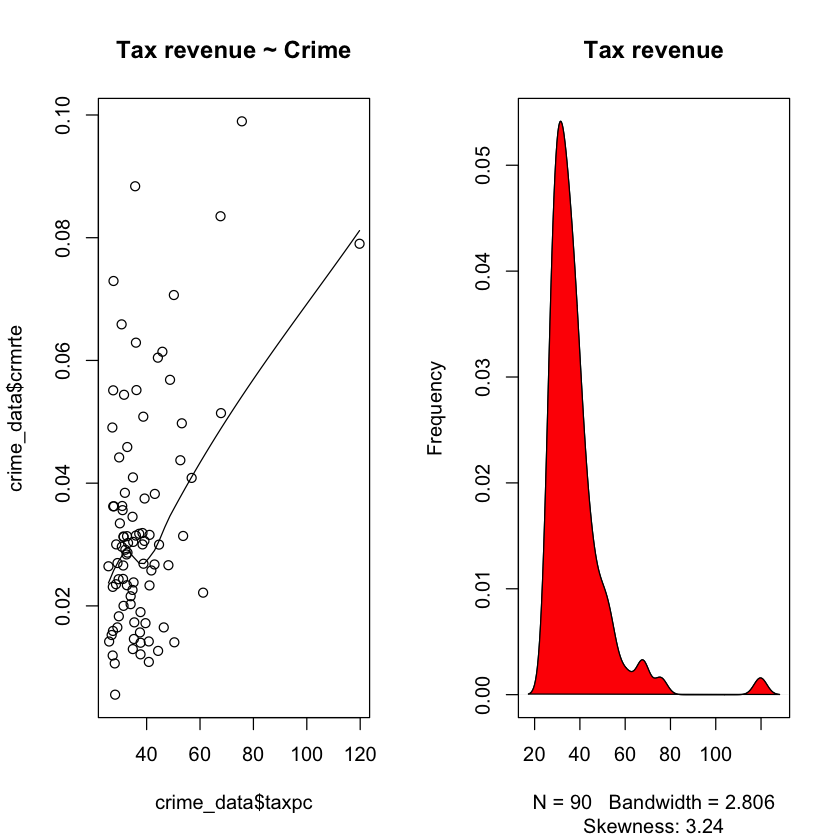

In [22]:
par(mfrow=c(1,2))
scatter.smooth(x=crime_data$taxpc, y=crime_data$crmrte, main = "Tax revenue ~ Crime")
plot(density(crime_data$taxpc), main="Tax revenue", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(crime_data$taxpc), 2)))  
polygon(density(crime_data$taxpc), col="red")



After catagorize region, one tax revenue outliner is located in "other". But overall, our assumption is still stand that the urban area hold higher tax revenue than other areas.



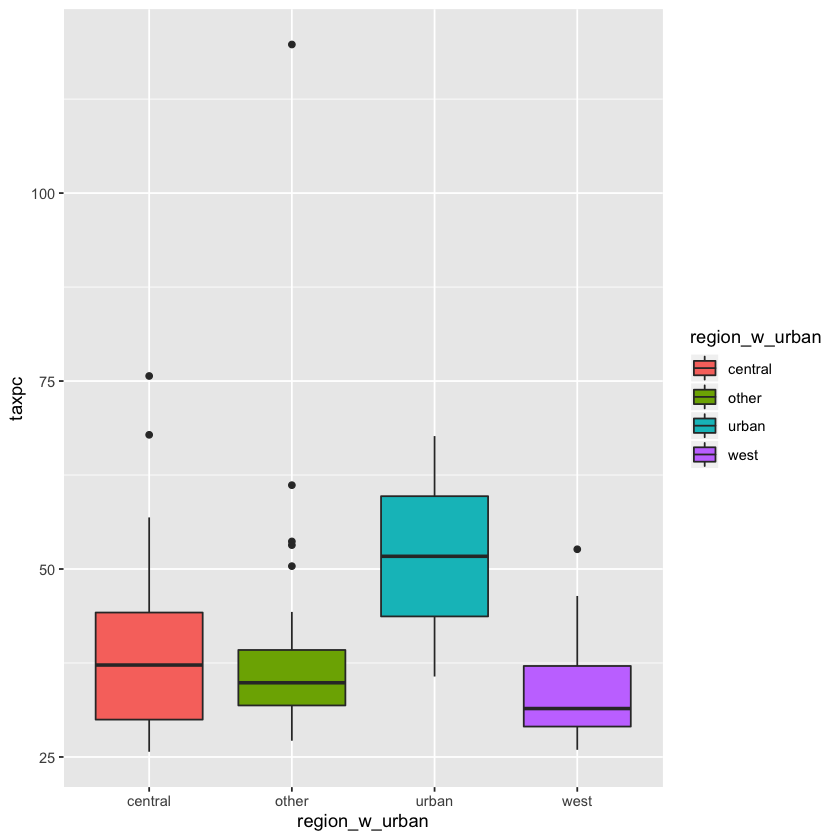

In [23]:
crime_data$region_w_urban <-  ifelse(crime_data$west == 1, "west", ifelse(crime_data$central == 1, "central", ifelse(crime_data$urban == 1 ,"urban", "other")))
ggplot(crime_data, aes(x= region_w_urban, y=taxpc, group=region_w_urban)) + 
  geom_boxplot(aes(fill=region_w_urban))



Similarly, In the population density plot, it is portraying a positive skewness in the distribution. It would mean that many population densities are under average value.
The linear relationship is more clear between population density and crime rate. In the region boxplot, it is not surprised to see urban area has overall highest population density than other region. 
However, some of extreme outliner located in central region, it is unclear if it is a mistakes data points or any specific reason for it. Although the reasons are unclear for these density outliners, the linear relationship between population density still hold, so we decide to not exclude any data points from population density.


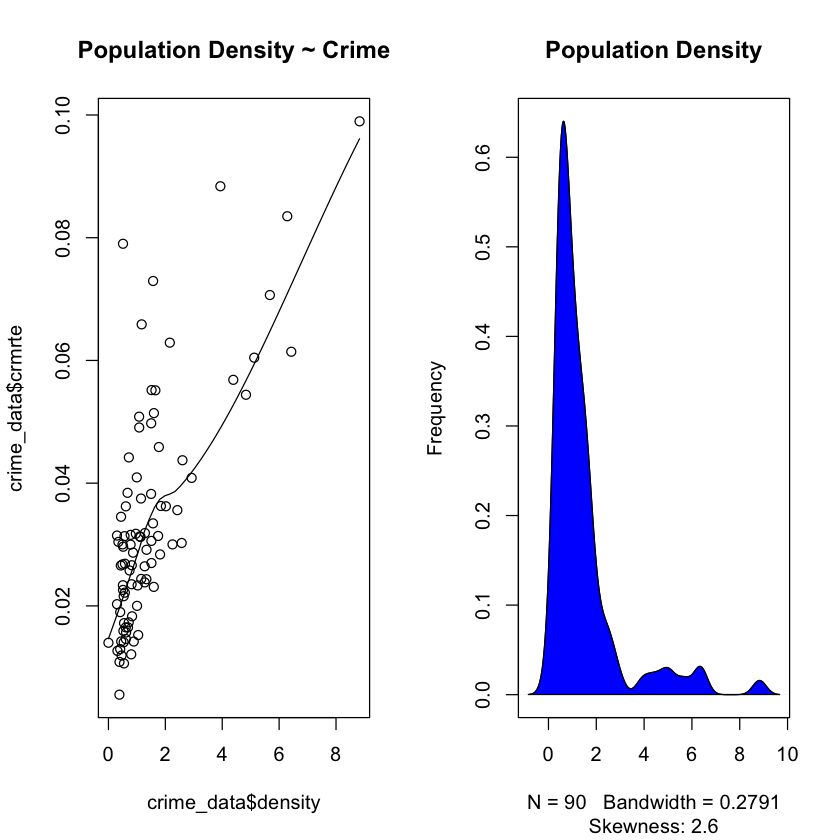

In [24]:
par(mfrow=c(1,2))
scatter.smooth(x=crime_data$density, y=crime_data$crmrte, main = "Population Density ~ Crime")
plot(density(crime_data$density), main="Population Density", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(crime_data$density), 2)))  
polygon(density(crime_data$density), col="blue")



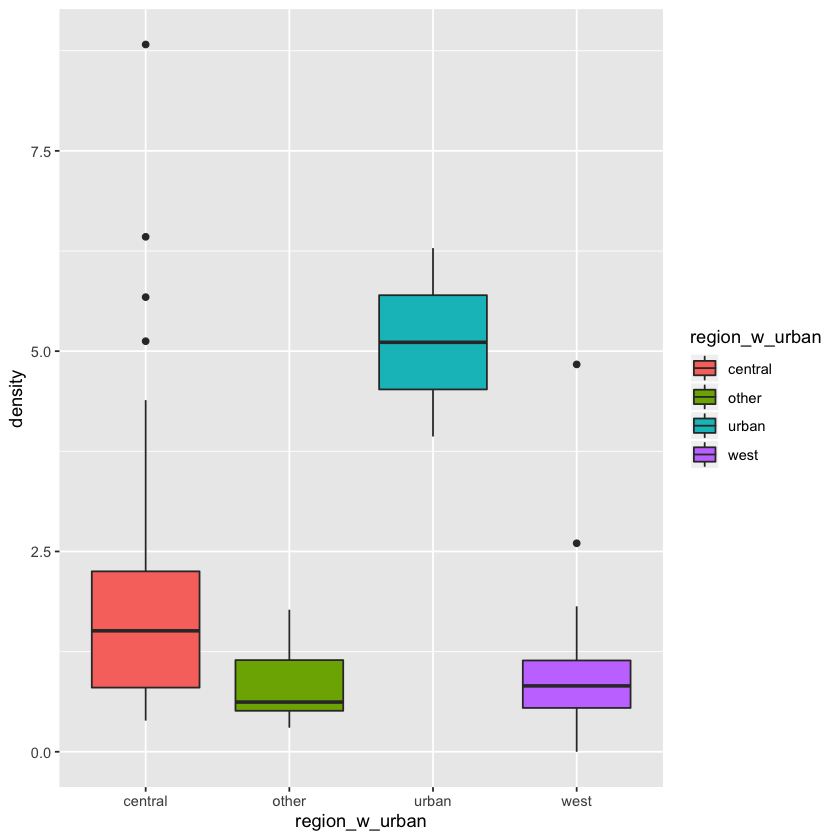

In [25]:
ggplot(crime_data, aes(x= region_w_urban, y=density, group=region_w_urban)) + 
  geom_boxplot(aes(fill=region_w_urban))

* **The outcome variable :**

In the outcome variable crime rate observation, it is defined by "crimes committed per person". The possible value will between 0 and 1, and the maxima value will be nearly impossible. Because that means everyone is a criminal.
We observed in below plot, it is portraying a positive skewness in the distribution. We decide to take logarithm of crime rate and it shows normal distribution. In all our 3 models, we used this logarithm of crime rate as our outcome variable. After the transformation, the interpretation will be percentage of changes to a specific independent  variable. 

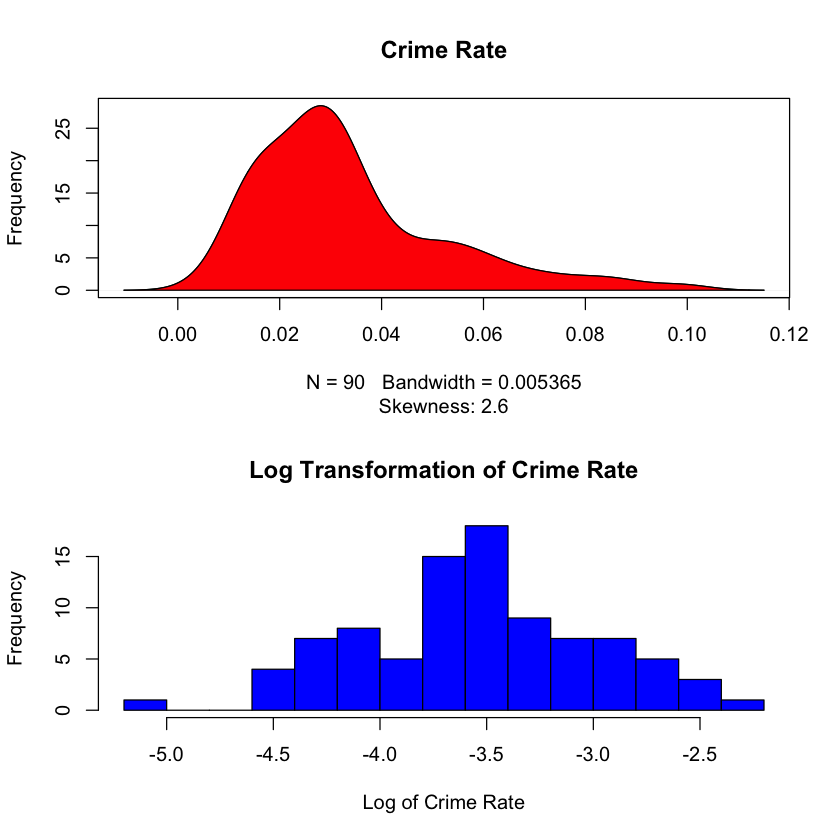

In [26]:
par(mfrow=c(2,1)) 
plot(density(crime_data$crmrte), main="Crime Rate", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(crime_data$density), 2)))  
polygon(density(crime_data$crmrte), col="Red")
hist(log(crime_data$crmrte),
     breaks = 20,
     col = "blue", 
     xlab = "Log of Crime Rate",
     main = "Log Transformation of Crime Rate")

Again, in below region plot, it aligns with our assumption that urban area has highest crime rate. The highest outliner is also in the central area, similar to population density's outliners. 
The plausible explanation is that certain city is included in central area, and they are not category as urban area. 

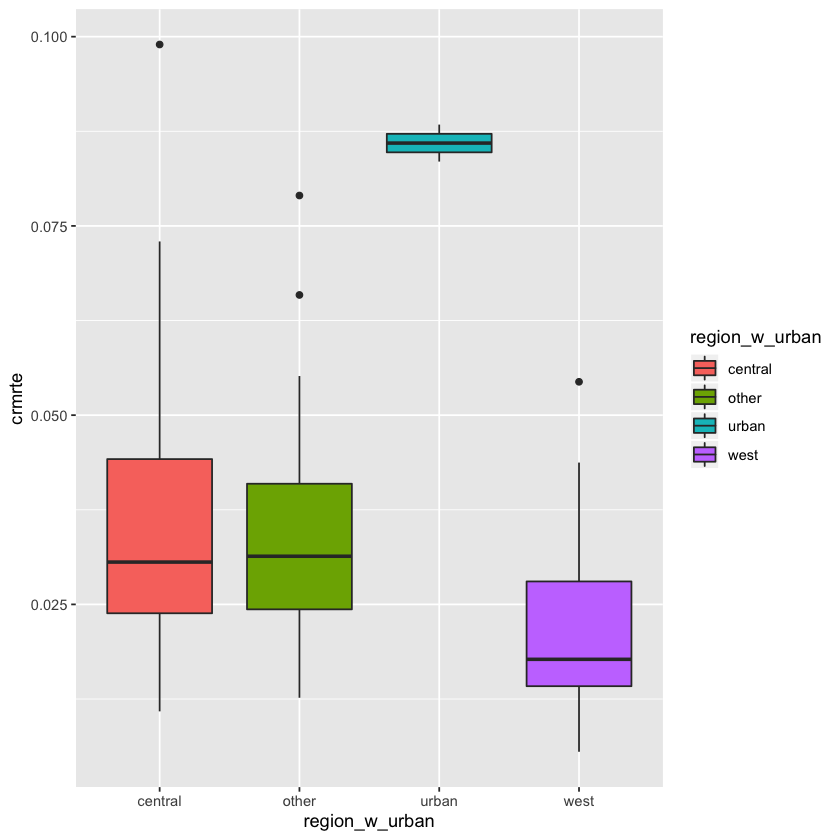

In [27]:
ggplot(crime_data, aes(x= region_w_urban, y=crmrte, group=region_w_urban)) + 
  geom_boxplot(aes(fill=region_w_urban))

### Model 1 - Evaluation
In our first model, it shows that tax revenue has very lower coefficient 0,007259. Since we take logarithm of crime rate, the interpretation will be a one dollar increase in tax revenue shows 0.7% in changes of crime rate committed per person. In the population density, for the increase of one unit (100 people per square mile )of density is associated with 20.8% in changes of crime rate committed per person. 

Both variables coefficient are positive, it is consistent with our hypothesis that higher tax rate and population density area has higher crime rate. The R squared indicates that 42.7% variations are explained by model 1.

In [28]:
model1 <- lm(log(crmrte) ~ taxpc + density, data = crime_data)
model1
summary(model1)$r.squared


Call:
lm(formula = log(crmrte) ~ taxpc + density, data = crime_data)

Coefficients:
(Intercept)        taxpc      density  
-4.11777741   0.00725975   0.20827252  


[1] 0.427725941

In the Residuals vs Leverage plot, two influence outliners are discovered. 

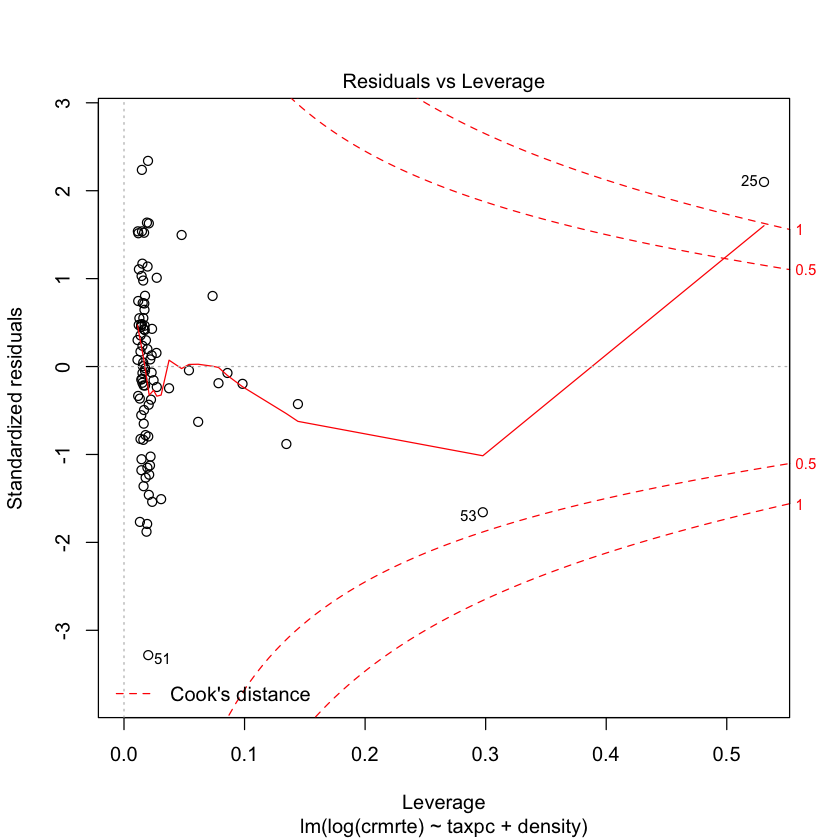

In [29]:
plot(model1, which=5)

The data point #53 has the highest population density, relative high tax revenue and highest crime rat. This data point could represent a busy urban area that has busy traffic in day time, the gangs gather at night time. It obvious influences the model, but it is still within 0.5 Cook’s distance, and represent a good example of our assumption that high population density associated with high crime rate. Therefore we will keep the data point even it has influence.

The data point# 25 has the maxima tax revenue that is over 3 times higher than the mean. It’s Cook’s distance is greater than 1, so we decided to remove this outliner.

In [30]:
summary(crime_data[,c('crmrte','taxpc',"density" )])
crime_data[c(25,53),c('crmrte','taxpc',"density","urban" )]

     crmrte              taxpc             density          
 Min.   :0.0055332   Min.   : 25.6929   Min.   :0.00002034  
 1st Qu.:0.0206043   1st Qu.: 30.7346   1st Qu.:0.54717666  
 Median :0.0300020   Median : 34.9161   Median :0.97924528  
 Mean   :0.0335099   Mean   : 38.1610   Mean   :1.43567023  
 3rd Qu.:0.0402493   3rd Qu.: 41.0101   3rd Qu.:1.56926137  
 Max.   :0.0989659   Max.   :119.7615   Max.   :8.82765198  

,crmrte,taxpc,density,urban
25,0.079016298,119.761452,0.511508942,0
53,0.098965898,75.672432,8.827651978,1


After removed data point #25, the model shows a major change. In the population density, for the increase of one unit (100 people per square mile )of density is associated with 23.5% in changes of crime rate committed per person. This coefficient is higher than the one with outliner. The tax revenue has much smaller and negative coefficient to crime rate. It means that a one dollar increase in tax revenue shows negative 0.06% in changes of crime rate.

In [31]:
crime_data2 <-crime_data[-c(25),]
model1 <- lm(log(crime_data2$crmrte) ~ crime_data2$taxpc + crime_data2$density)
model1


Call:
lm(formula = log(crime_data2$crmrte) ~ crime_data2$taxpc + crime_data2$density)

Coefficients:
        (Intercept)    crime_data2$taxpc  crime_data2$density  
       -3.870673192         -0.000625729          0.235796105  


In the residual vs fitted plot, we could see that the red line is not along with the 0 and it indicates violation of zero conditional mean. The plausible reason is omitted variable bias. We will introduced more variables in the model2.

Also the strong heteroscedasticity is observed by the scale-location plot. The red line is tracking of mean, and its curve represent more variances.

The Q-Q plot shows a normal distributed errors except the data point #50 outlying. But since our data set is relatively large, we still could assume the normality of distribution of errors.

We are still seeing few outliners within Cook’s distance 0.5. The purpose for this study is not to create a perfect model, we are trying to understand the variables relationship. Therefore those outliners will be remain as it is.

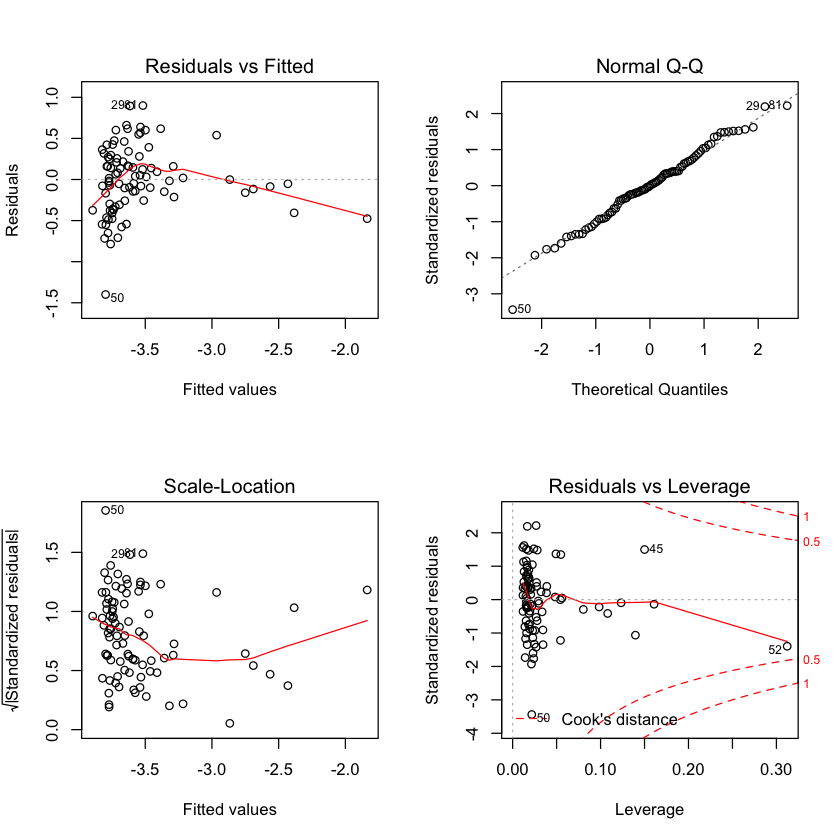

In [32]:
par(mfrow=c(2,2)) 
plot(model1, which = c(1,2,3,5))

Multicollinearity between two variables can assessed by computing a score called the variance inflation factor (or VIF), which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

Each of our variable’s VIFs is small (less than 2), which indicates that there is no multicollinearity in our model 1. So it is fair to claim that CLM Assumption of No Perfect Collinearity is satisfied.



In [33]:
vif(model1)

crime_data2$taxpc crime_data2$density 
         1.30956157          1.30956157

Finally, as we anticipated that population density has highly statistic significant in model 1. However the tax revenue show no statistic significant in the regression model. The plausible reason is that certain high tax revenue coming from a good low density area which has also lower crime rate. Thus we decide to remove the variable in model 2. The R squared shows there are 43% of variation are explained by this model.

In [34]:
summary(model1)


Call:
lm(formula = log(crime_data2$crmrte) ~ crime_data2$taxpc + crime_data2$density)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.3996469 -0.2584278 -0.0011399  0.2566611  0.8996622 

Coefficients:
                        Estimate   Std. Error   t value   Pr(>|t|)    
(Intercept)         -3.870673192  0.176920047 -21.87809 < 2.22e-16 ***
crime_data2$taxpc   -0.000625729  0.005087054  -0.12300    0.90239    
crime_data2$density  0.235796105  0.032871690   7.17323 2.4066e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.411462 on 86 degrees of freedom
Multiple R-squared:  0.435251,	Adjusted R-squared:  0.422117 
F-statistic:   33.14 on 2 and 86 DF,  p-value: 2.13694e-11


## Model #2

By looking at the correlation heat map we are able to reason which variables highly affect our outcome variable: "crmrte". We piece together an understanding for which variables coould also be co-linear with each other. Therefore we tried to construct our model to avoid multi-collinearity. In addition we selected variables that capture both highly positive and highly negative correlations with "crmrte". This allows us to explain the behavior of crime rate better as certain features cause it to increase while others cause it to decrease, we must capture both of these traits.

Before building the model, we appropriately transform variables we are considering by taking their log.

One example of this can be shown below, with "polpc". There is a stronger correlation between the log of "polpc" and the log of "crmrte" in comparison to the un-transformed data values.

Overall, there is a better correlation in the percent changes of two variables compared to their un-transormed values. By transforming the data overall we can see the shape of the histogram become more normal, and see a better fit in our regression model. Considering we are not losing any information by transforming variables with the "log" function, by best practices and ease of interpretation with percent changes, we choose to use the "log" results.

In [35]:
comparisons <- c( "log(crmrte), log(polpc)", "log(crmrte), polpc", "crmrte, polpc"
)
correlations <- c(
    round(cor(log(crime_data$polpc), log(crime_data$crmrte)), 4), 
    round(cor(crime_data$polpc, log(crime_data$crmrte)), 4), 
    round(cor(crime_data$polpc, crime_data$crmrte), 4)
)

crime_police_cors <- data.frame(comparisons, correlations)
crime_police_cors

comparisons,correlations
"log(crmrte), log(polpc)",0.5025
"log(crmrte), polpc",0.4270
"crmrte, polpc",0.4743


### Model 2 - Diagrams

Our model will taken on the below strucuture: 
$log(crmrte)  =  log(polpc) + log(prbarr) + log(prbconv) + density + west$
    
**Note:** 
* **taxpc** from Model 1 was not included in Model 2 because it has a very low coefficient, and highly negligible effect on the outcome. The statistical/ practical significance is extremely low.
* **density** is better interpreted without the transformation, therefore we do not take its log
* **west** is categorical variable therefore we do not take the log.
* The **west** variable is chosen for Model 2 because of the highly negative correlation "west" has with crime rate. This indicates a strong relationship with crime rate unlike the **central** variable. In addition **west** may reflect some information on **pctminority80** as percent minority and west have an extremely strongly linear relationship. To avoid multi-collinearity we do not include both, but rather the variable that has a stronger relationship with crime rate. This happens to be **west**!

To give some insight into the spread and behavior of our chosen variables, we have a set of histograms and scatter plots below. The histogram comparisons are used to display the normality of data when using the log transformation versus the data points as is. The plots help to describe the relationship the variables have with the log(crmrte)


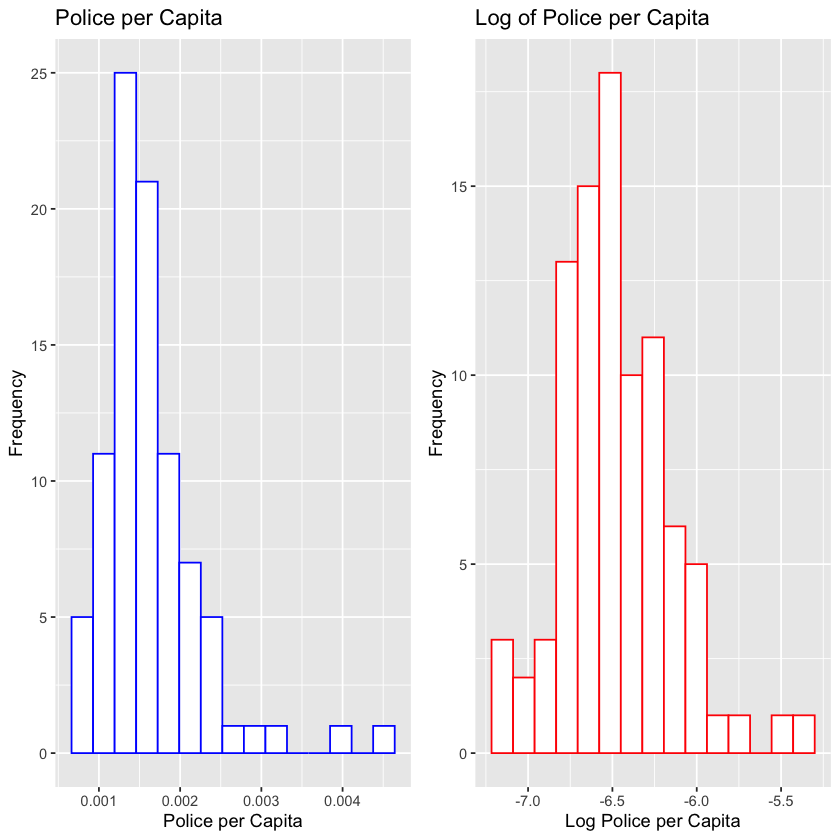

In [36]:
plot1 <- ggplot(crime_data, aes(x=polpc)) + 
  geom_histogram(bins = 15,color="blue", fill="white") +
    ggtitle("Police per Capita") + 
    xlab("Police per Capita") + 
    ylab("Frequency")


plot2 <-ggplot(crime_data, aes(x=log(polpc))) + 
  geom_histogram(bins = 15, color="red", fill="white") +
    ggtitle("Log of Police per Capita") +
    xlab("Log Police per Capita") + 
    ylab("Frequency")


grid.arrange(plot1, plot2, ncol=2)

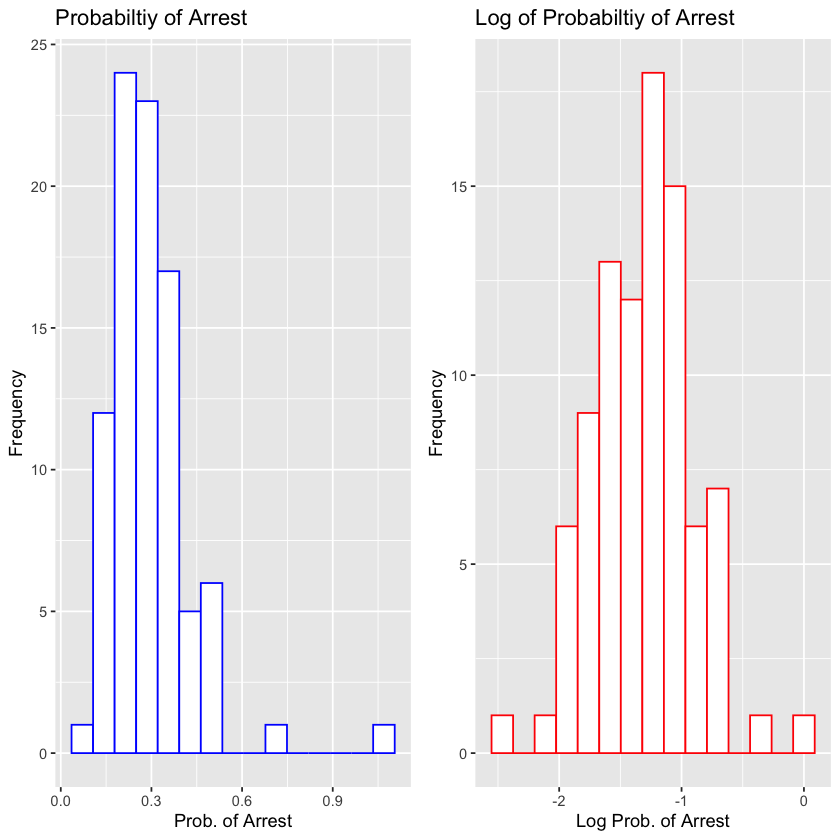

In [37]:
plot1 <- ggplot(crime_data, aes(x=prbarr)) + 
  geom_histogram(bins = 15,color="blue", fill="white") +
    ggtitle("Probabiltiy of Arrest") + 
    xlab("Prob. of Arrest") + 
    ylab("Frequency")


plot2 <-ggplot(crime_data, aes(x=log(prbarr))) + 
  geom_histogram(bins = 15, color="red", fill="white") +
    ggtitle("Log of Probabiltiy of Arrest") + 
    xlab("Log Prob. of Arrest") + 
    ylab("Frequency")


grid.arrange(plot1, plot2, ncol=2)

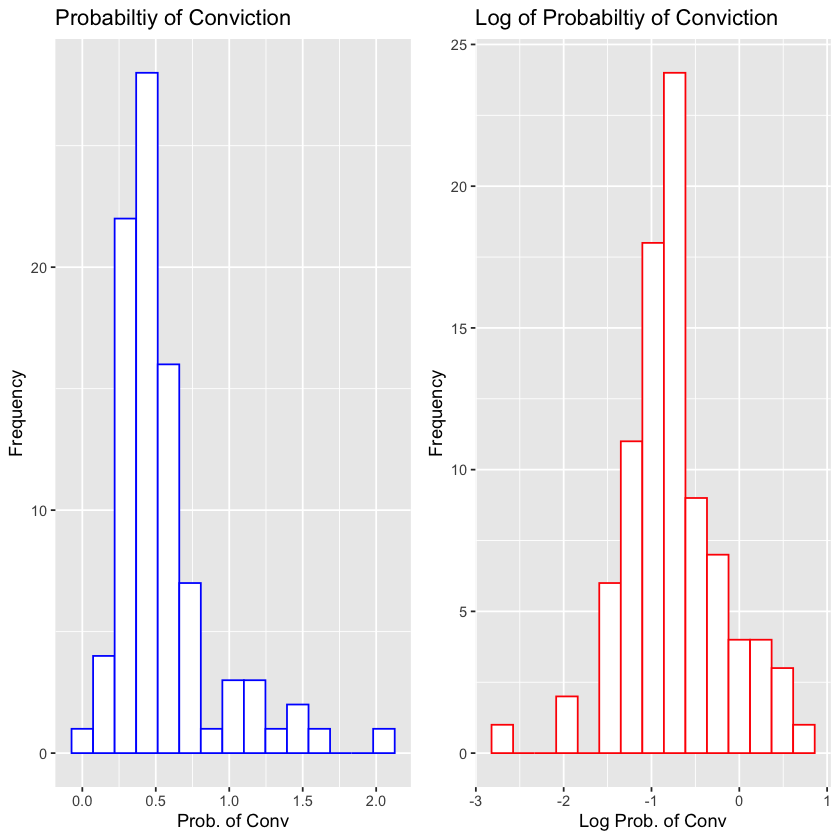

In [38]:
plot1 <- ggplot(crime_data, aes(x=prbconv)) + 
  geom_histogram(bins = 15,color="blue", fill="white") +
    ggtitle("Probabiltiy of Conviction") + 
    xlab("Prob. of Conv") + 
    ylab("Frequency")


plot2 <-ggplot(crime_data, aes(x=log(prbconv))) + 
  geom_histogram(bins = 15, color="red", fill="white") +
    ggtitle("Log of Probabiltiy of Conviction") + 
    xlab("Log Prob. of Conv") + 
    ylab("Frequency")


grid.arrange(plot1, plot2, ncol=2)

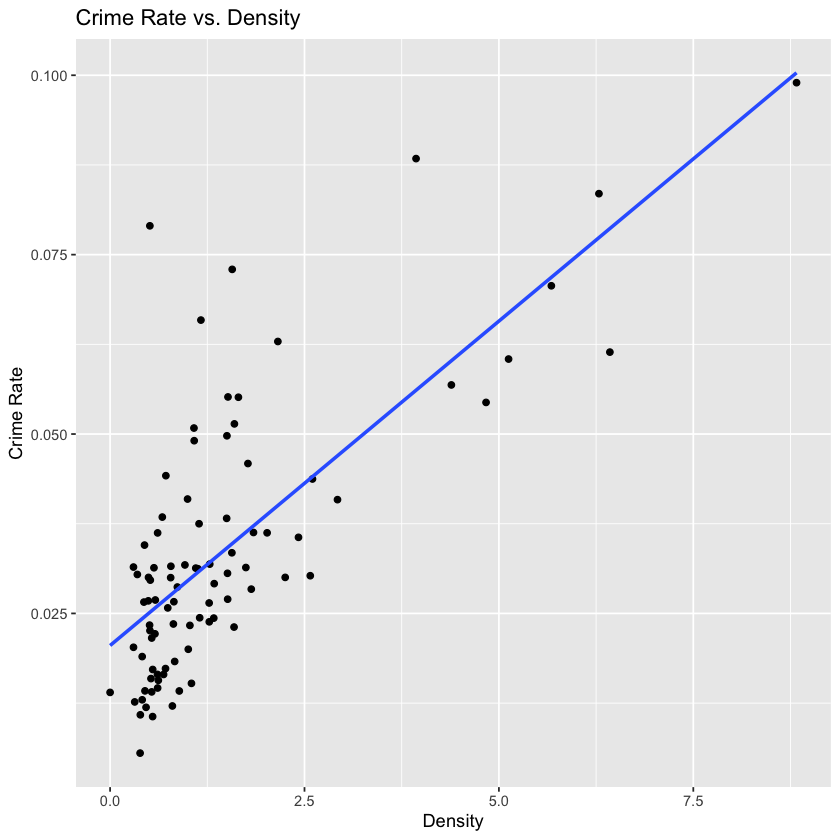

In [39]:
ggplot(crime_data, aes(density, crmrte)) + geom_point() +
    geom_smooth(method = "lm", se = FALSE) + ggtitle("Crime Rate vs. Density")+ xlab("Density") +
    ylab("Crime Rate")

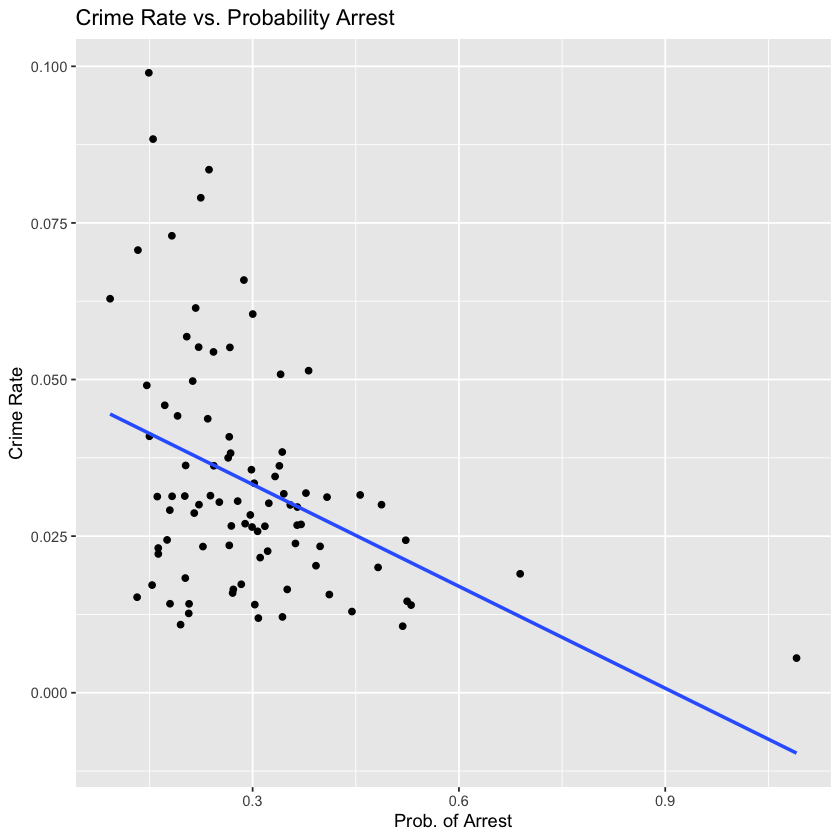

In [40]:
ggplot(crime_data, aes(prbarr, crmrte)) + geom_point() +
    geom_smooth(method = "lm", se = FALSE) + ggtitle("Crime Rate vs. Probability Arrest")+ 
    xlab("Prob. of Arrest") +
    ylab("Crime Rate")

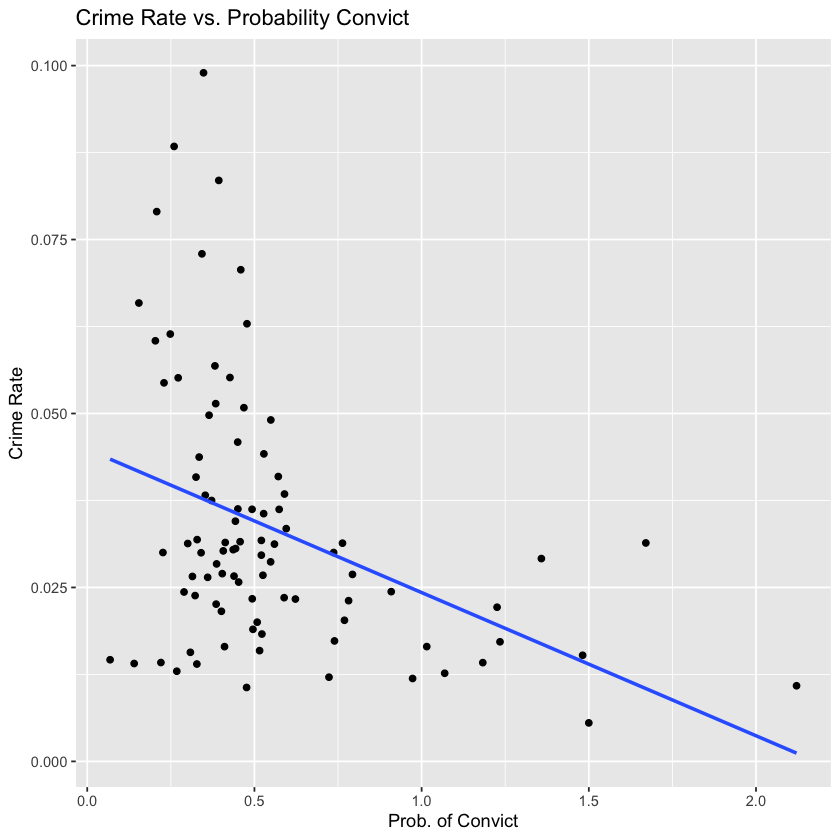

In [41]:
ggplot(crime_data, aes(prbconv, crmrte)) + geom_point() +
    geom_smooth(method = "lm", se = FALSE) + ggtitle("Crime Rate vs. Probability Convict")+ 
    xlab("Prob. of Convict") +
    ylab("Crime Rate")

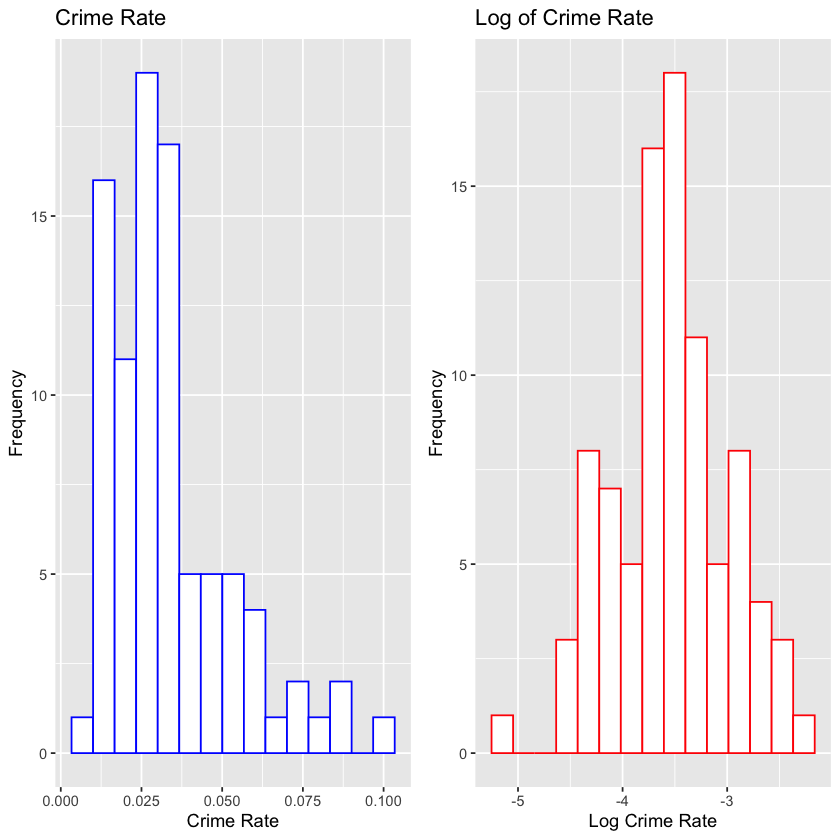

In [42]:
plot1 <- ggplot(crime_data, aes(x=crmrte)) + 
  geom_histogram(bins = 15,color="blue", fill="white") +
    ggtitle("Crime Rate") + 
    xlab("Crime Rate") + 
    ylab("Frequency")


plot2 <-ggplot(crime_data, aes(x=log(crmrte))) + 
  geom_histogram(bins = 15, color="red", fill="white") +
    ggtitle("Log of Crime Rate") +
    xlab("Log Crime Rate") + 
    ylab("Frequency")


grid.arrange(plot1, plot2, ncol=2)

### Model 2 - Evaluation

In [43]:
model2 <- lm(log(crmrte) ~ log(polpc) + log(prbarr) + log(prbconv) + density + west, data = crime_data)

summary(model2)


Call:
lm(formula = log(crmrte) ~ log(polpc) + log(prbarr) + log(prbconv) + 
    density + west, data = crime_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.8924238 -0.1786704  0.0211971  0.2282444  0.5992347 

Coefficients:
               Estimate Std. Error  t value   Pr(>|t|)    
(Intercept)  -1.5256636  0.7716356 -1.97718 0.05130103 .  
log(polpc)    0.4387717  0.1123024  3.90705 0.00018834 ***
log(prbarr)  -0.4261292  0.0899288 -4.73852 8.6743e-06 ***
log(prbconv) -0.2887881  0.0638173 -4.52523 1.9696e-05 ***
density       0.1098237  0.0253928  4.32499 4.1761e-05 ***
west         -0.4328952  0.0758613 -5.70641 1.6881e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.304043 on 84 degrees of freedom
Multiple R-squared:  0.710252,	Adjusted R-squared:  0.693005 
F-statistic: 41.1815 on 5 and 84 DF,  p-value: < 2.22e-16


### Coefficient Interpretation:

* prbarr: For a 1% increase in probability of arrest, there is a 0.426% decrease in crime rate.
* prbconv: For a 1% increase in probability of conviction, there is a 0.289% decrease in crime rate.
* polpc: For a 1% increase in police per capita, there is a 0.439% increase in crime rate.
* density: For every 100 people that change in a county's population, there is a 11.0% increase in crime rate 
* west: If a county is in the western region, there is a 43.3% increase in crime rate.



**We will discuss the residuals, omitted variable bias, and other facets of this model in the "CLM Assumptions" and "Ommitted Variable", sections of the report**

## Model #3

From the plot below, we can see the relationship of crime rate and all explanatory variables. The estimated crime rate increases as value of explanatory variables increases. And the line looks like a linear line which fits the data points on the graph. So, we can see the crime rate and explanatory variables has a linear relationship. In model3, we want to explore as many variables as possible based on previous two models. We assume all variables can affect crime rate. And we want to see how those variables can affect the crime rate committed per person. 

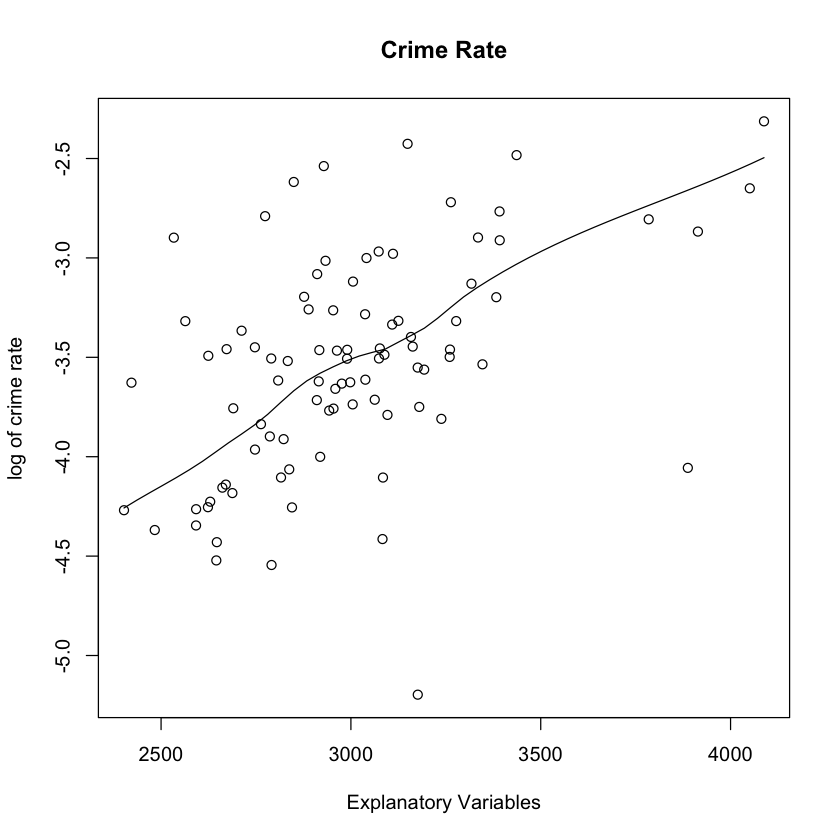

In [44]:
scatter.smooth(log(crime_data$prbarr)
              +log(crime_data$prbconv)
              +crime_data$prbpris
              +crime_data$avgsen
              +log(crime_data$polpc)
              +crime_data$density
              +crime_data$taxpc
              +crime_data$west
              +crime_data$central
              +crime_data$pctmin80
              +crime_data$wcon
              +crime_data$wtuc
              +crime_data$wtrd
              +crime_data$wfir
              +crime_data$wser
              +crime_data$wmfg
              +crime_data$wfed
              +crime_data$wsta
              +crime_data$wloc
              +crime_data$mix
              +crime_data$pctymle, y=log(crime_data$crmrte), main="Crime Rate", xlab="Explanatory Variables", ylab="log of crime rate")

**Version 3.1**

We will include all the variables except "county" and "year". Because both of them are constant. "county" is the identifier and "year" is a fixed year which is 1987. “crmrte”, which is the crimes rate per person, is our outcome variable. Like the preivous two models, we will use log of "crmrte". Since we want to see how the independent variables can affect percentage of increase or decrease rate of "crmrte". Other variables are independent variables that can affect the outcome variable.

In [45]:
model3 <- lm(log(crmrte)~log(prbarr)
              +log(prbconv)
              +prbpris
              +avgsen
              +log(polpc)
              +density
              +taxpc
              +west
              +central
              +urban
              +pctmin80
              +wcon
              +wtuc
              +wtrd
              +wfir
              +wser
              +wmfg
              +wfed
              +wsta
              +wloc
              +mix
              +pctymle, data = crime_data)

**Version 3.2**

By using “vif(model_3) > 4”, we found out “density” and “urban” fields are returning true. In other words, “density”(people per sq. mile), and “urban”(whether in SMSA) are moderately correlated. So, we will not consider those two fields together as independent variables. We will keep density variable and remove the urban variable. Because the density of an area can also show whether the place is urban or not.  Although there might be some correlation between different types of wages, they are weekly wages categorized from different job types. So, we can still say those wages are not perfectly multicollinear and are independent to each other. So, we will keep all different types of wages.

In [46]:
vif(model3) > 4

log(prbarr) log(prbconv)      prbpris       avgsen   log(polpc)      density 
       FALSE        FALSE        FALSE        FALSE        FALSE         TRUE 
       taxpc         west      central        urban     pctmin80         wcon 
       FALSE        FALSE        FALSE         TRUE        FALSE        FALSE 
        wtuc         wtrd         wfir         wser         wmfg         wfed 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
        wsta         wloc          mix      pctymle 
       FALSE        FALSE        FALSE        FALSE

In [47]:
model3 <- lm(log(crmrte)~log(prbarr)
              +log(prbconv)
              +prbpris
              +avgsen
              +log(polpc)
              +density
              +taxpc
              +west
              +central
              +pctmin80
              +wcon
              +wtuc
              +wtrd
              +wfir
              +wser
              +wmfg
              +wfed
              +wsta
              +wloc
              +mix
              +pctymle, data = crime_data)

### Model 3 - Evaluation

In order to know the behavior of linear regression model3, we plot the following graphs. From the "Scal-Location" plot, the average standardized residual line is not a horizontal line, we can tell the model is heteroskedasticity. We can use robust standard error to do coefficient test for model3. From the QQ plot, we can see the error is not normally distributed, but the sample size is 90 which is much larger than 30. Base on the central limit theory, the error can be considered as normally distriubted.

[1] "Sample size:  90"

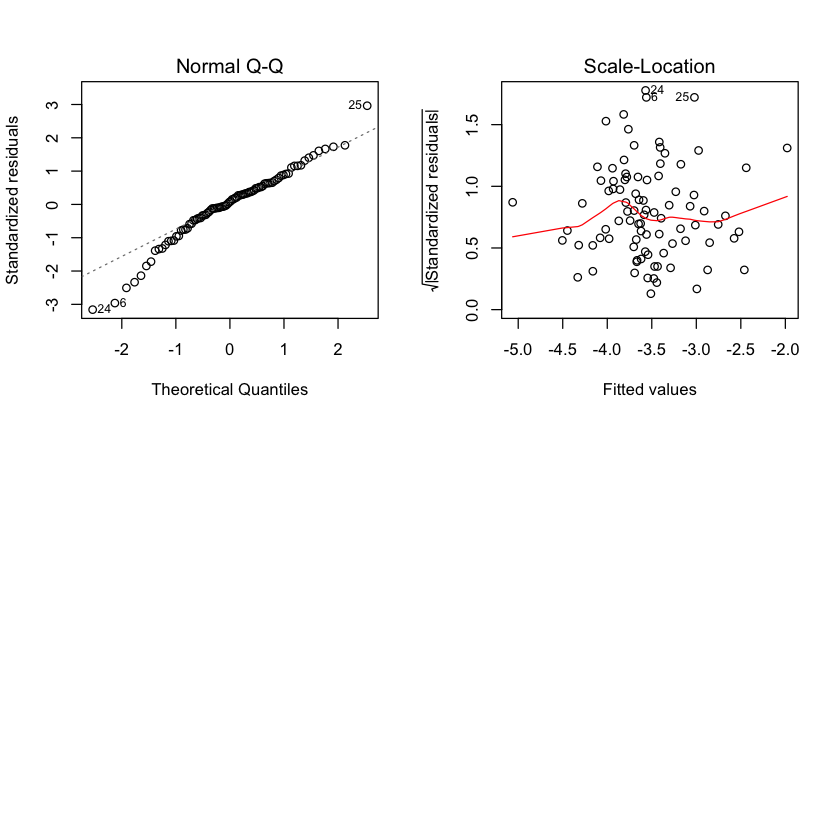

In [48]:
par(mfrow=c(2,2))
plot(model3, which = c(2, 3))
paste("Sample size: ", nrow(crime_data))

So, we can use the coefficient test with robust standard error to test model3.

In [49]:
paste("Model 3 heteroskedasticity-robust standard error: ")
coeftest(model3, vcov=vcovHC)

[1] "Model 3 heteroskedasticity-robust standard error: "


t test of coefficients:

                  Estimate    Std. Error  t value   Pr(>|t|)    
(Intercept)  -2.329916e+00  1.979867e+00 -1.17680 0.24337666    
log(prbarr)  -4.168847e-01  1.020900e-01 -4.08350 0.00011916 ***
log(prbconv) -3.077946e-01  1.403721e-01 -2.19270 0.03175355 *  
prbpris      -1.258568e-01  5.172308e-01 -0.24333 0.80848381    
avgsen       -2.595118e-02  1.559811e-02 -1.66374 0.10076699    
log(polpc)    4.270791e-01  2.382142e-01  1.79284 0.07744648 .  
density       9.729224e-02  4.347082e-02  2.23810 0.02849263 *  
taxpc         8.933844e-04  8.369952e-03  0.10674 0.91531182    
west         -2.806206e-01  1.626998e-01 -1.72478 0.08911088 .  
central      -1.804404e-01  1.138405e-01 -1.58503 0.11759997    
pctmin80      5.430552e-03  4.041702e-03  1.34363 0.18353466    
wcon          6.393079e-04  8.641296e-04  0.73983 0.46195053    
wtuc          3.553609e-04  8.083432e-04  0.43962 0.66160901    
wtrd          7.120372e-04  1.819576e-03  0.39132 0.69678388    

From the test result of model3, we can see among all those variables, only "prbarr", "prbconv", "density", "wfed" are statistically significant coefficients. In other words, only those four variables can statistically significantly affect crime rate. "prbarr", "prbconv" have negative relationship with crmrte. In other words, if 1% increase in probability of arrest, there is 0.417% drops in crime rate. If 1% increase in probability of conviction, there is 0.308% drops in crime rate. 
Meanwhile, "density", "wfed" have positive relationship with crmrte. In other words, for each unit of density (100 people per square mile) increases, the crime rate goes up by 9.73%. For each unit of federal employees' weekly wage increases, there is 0.258% increases in crime rate.

From the effect size test below, we can see that prbarr, prbconv and density have larger than 0.4 effect size. They have large effect size on crime rate. That makes sense in practice, since probability of arrest and conviction can effectly control people who have crime, so the crime rate can drop effectively. And density can also impact crime rate a lot. If a place is crowded, there will be more crime. In conclusion, not all the variables are significant. Among all those variables only "prbarr", "prbconv", "density", "wfed" have statistically significant impact on crime rate. And only "prbarr", "prbconv" and "density" have practically significant impact.

In [50]:
paste("Effect size of each explanatory variable:")
cohens_f(model3)

[1] "Effect size of each explanatory variable:"

Parameter,Cohens_f_partial,CI,CI_low,CI_high
log(prbarr),1.0175961255,0.9,0.7690096757,1.260174151
log(prbconv),1.0985150954,0.9,0.8429563382,1.347750579
prbpris,0.0593672836,0.9,0.0000000000,0.253075026
avgsen,0.0224897951,0.9,0.0000000000,0.178892637
log(polpc),0.7731736567,0.9,0.5434754800,0.997945049
density,0.6941156110,0.9,0.4697332354,0.913969873
taxpc,0.0648017923,0.9,0.0000000000,0.256666164
west,0.7651372574,0.9,0.5359985284,0.989388570
central,0.3967227313,0.9,0.1881858188,0.602467340
pctmin80,0.1851114268,0.9,0.0000000000,0.385599808


## 3. An Assessment of the CLM Assumptions


In this section, Model 2 is assessed for CLM assumptions.

To determine which model has the most parsimonious fit, we utilized the Bayesian Information Criteria(BIC) which penalizes more on the model as the number of variables increases. Overall, larger BIC values means worse fit, and it’s also important to note that BIC doesn’t describe the quality of the model, but rather the relative fit between models.

Based on comparisons shown below, model 1 with only two variables has the highest BIC value, since model 1 has too few variables. Model 1 can not fit the population model as well as the other two models. 

In model 2, we eliminated tax revenue and add omitted variables, such as probability of arrest and convict, police per capital and region west. Model 2 has the smallest variables.

Model 3 attempts to include all possible explanatory variables, this model might have a good fit, but because it exhibits more independent variables than model 1 and model 2 we find the BIC score falling in between the other models.

Based on BIC and practical meaning we've seen throught the report to neither under nor overfit our model, we see that  model 2 exhibits the most parsimonious fit of all three models. We will use model 2 for our CLM assumption explanation and policy suggestion.

In [51]:
paste("BIC value for Model 1 :", BIC(model1))
paste("BIC value for Model 2 :", BIC(model2))
paste("BIC value for Model 3 :", BIC(model3))

[1] "BIC value for Model 1 : 109.402887318064"

[1] "BIC value for Model 2 : 66.3928910920819"

[1] "BIC value for Model 3 : 97.2151066690515"

### 3.1 Linear population model:

We are ensuring that there is linearity in all the explanatory variables used to predict our outcome variable. We have transformed some of our explanatory variables using the "log()" function to achieve better normality and accuracy of the model. As you can see in the formula for our model, we made sure to express every **coefficient * variable** pair with linearity in nature, there were no transformations that violated this. Overall we have not violated MLR 1.

We can also use the Residuals vs Fitted plot to further confirm linearity given that there is no apparent pattern amongst the data points!

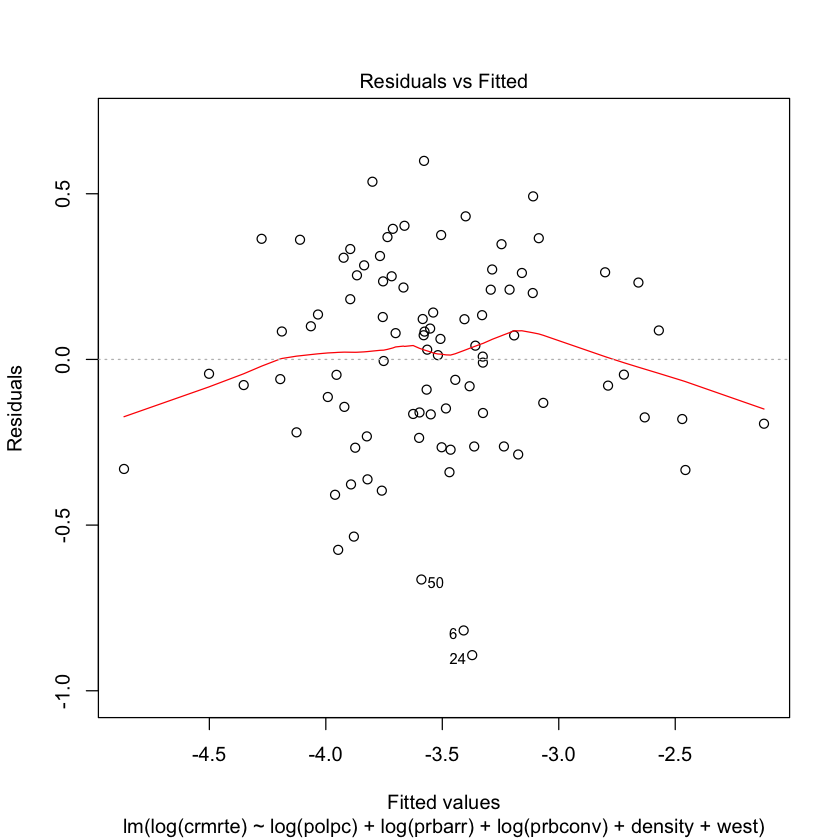

In [52]:
plot(model2, which = 1)

### 3.2 Random Sampling:

An initial assumption that we must make is that the data we are studying has been randomly collected; overall the population distribution must be independent and identically distributed (IID). 

To do a simple sanity check to verify this from our end we have compared the regional spread of the counties, to show that the data is not biassed to any given region. 

The original study took seven observations over the period of (1981-87) with 630 observations from the FBI’s Uniform Crime Reports, North Carolina Dept. of Correction. Our study focusses on the randomly collected, balanced fixed dataset of 90 units – counties  of  North  Carolina  - in the year 1987. Most of the general demographic variables were drawn from census data and overall there is no obvious clustering even though the data that is not time-series supported.

To the best of our knowledge and study, it is fair to say that the data was randomly selected. Therefore, we can confirm that we have not violated MLR 2.

In [53]:
paste("West Region", nrow(crime_data[crime_data$region == "west",]))
paste("Central Region", nrow(crime_data[crime_data$region == "central",]))
paste("Unknown Region", nrow(crime_data[crime_data$region == "unknown",]))

[1] "West Region 21"

[1] "Central Region 33"

[1] "Unknown Region 36"

### 3.3 No perfect multicollinearity:

In model 2, we make sure to avoid perfect multi-collinearity. As shown earlier in the report we used tools such as the correlation heat map, and various diagrams between our explanatory variables to ensure that the explanatory variables we chose were not highly correlated with each other. For example, we noticed that in the heat map  "density" and "urban" seemed to have near perfect collinearity therefore we made sure to only include one of these variables in our  model; we chose "density" because it had a higher correlation to crime rate.


Multicollinearity can be assessed by computing a score called the variance inflation factor (or VIF) as well, which measures how much the variance of a regression coefficient is inflated due to multicollinearity in the model. The smallest possible value of VIF is one (absence of multicollinearity). A VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. Below we present all the VIF values observed for the chosen explanatory variables in Model 2. We can see that all of the values are very nominal, in the range of 1.0 - 1.5. Therefore it is fair to claim that the third CLM Assumption of No Perfect Collinearity is satisfied.

In [54]:
vif(model2)

log(polpc)  log(prbarr) log(prbconv)      density         west 
  1.27768548   1.26345502   1.22438522   1.43719321   1.03480491

### 3.4 Zero-conditional mean:

Zero conditional mean is interpretted as the value of the residuals or the error term "𝑢", must not show any systematic pattern and must have a mean of 0.


After taking the log of the outcome variable, we use the Residuals vs Fitted plot to check the zero-conditional mean assumption. From the graph, we can see the mean of the residuals is almost a flat band. The red line which represents the mean residuals for the fitted values is around zero. We can also note that the residuals plotted below have no clear pattern, they are randomly scattered throughout.

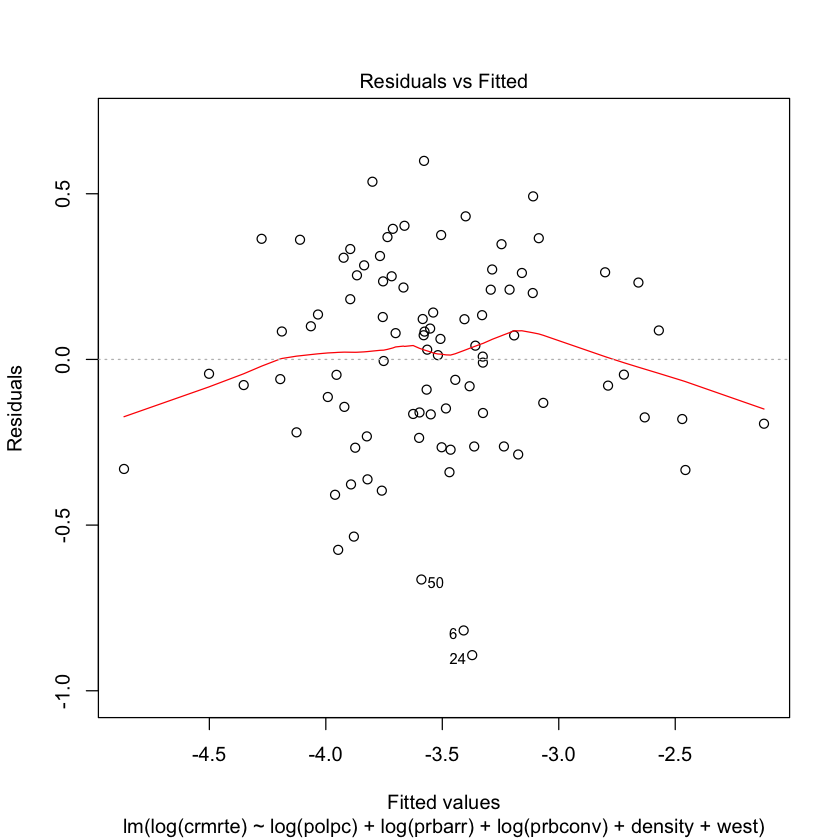

In [55]:
plot(model2, which = 1)

### 3.5 Homoskedasticity:

Homoskedasticity is the assumption that is that errors have a constant variances across all observed points. In addition this means that the explanatory variable values are independent from the variability of error. To perfectly achieve this is slightly unrealistic, accoridng to below scale-location plot of model 2,it indicates the errors in fact represent heteroscedasticity. 

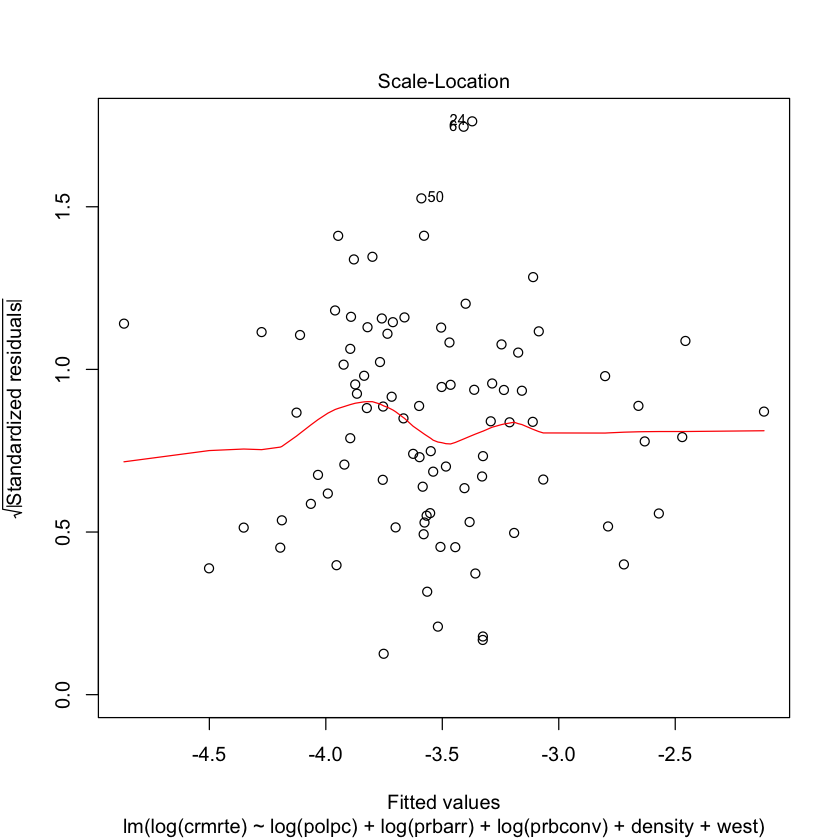

In [56]:
plot(model2, which = 3)

In R, we could use **Breusch-Pagan Test** to further confirm heteroskedasticity. Given that the p-value is less than 0.05, this result shows that we can safely reject the null hypothesis that the variance of residuals is constant, hence confriming heteroskedasticity. Therefore we are saying that the variance of the error terms is not constant.

In [57]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 13.81104, df = 5, p-value = 0.0168553


Because we see heteroskedasticity, we want to adjust takes steps towards correcting the standard errors, we use the vcovHC() function from the sandwich package to extract the heteroskedasticity-robust covariance matrix. From this we can get the variance of each coefficient and therefore get the robust standard error. This allows us to test against proper t critical values. Proceeding with robust standard errors is good conservative practice!


Comparing two results, we see that the standard errors are higher in the correction model than the original model. And statistically significant is slightly lower in probability of convict variables and polic per capita two variables.

In [58]:
se.model2 = coeftest(model2, vcov=vcovHC)


print("ORIGINAL")
coeftest(model2)

print("ROBUST")
se.model2

[1] "ORIGINAL"



t test of coefficients:

                Estimate  Std. Error  t value   Pr(>|t|)    
(Intercept)  -1.52566359  0.77163565 -1.97718 0.05130103 .  
log(polpc)    0.43877174  0.11230243  3.90705 0.00018834 ***
log(prbarr)  -0.42612919  0.08992878 -4.73852 8.6743e-06 ***
log(prbconv) -0.28878806  0.06381731 -4.52523 1.9696e-05 ***
density       0.10982365  0.02539279  4.32499 4.1761e-05 ***
west         -0.43289524  0.07586126 -5.70641 1.6881e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "ROBUST"



t test of coefficients:

                Estimate  Std. Error  t value   Pr(>|t|)    
(Intercept)  -1.52566359  1.02108055 -1.49417 0.13887943    
log(polpc)    0.43877174  0.14545126  3.01662 0.00338162 ** 
log(prbarr)  -0.42612919  0.10473223 -4.06875 0.00010626 ***
log(prbconv) -0.28878806  0.11874313 -2.43204 0.01713852 *  
density       0.10982365  0.02782605  3.94679 0.00016383 ***
west         -0.43289524  0.08748390 -4.94828 3.8015e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


We can see here that all of our explanatory variables are statistically significant. Using the legend and the t-value, we can see that density is one of the variables that is highly significant. As previously explained in the data density is shown as a decimal, where as the unit is 100s of people per squre mile. Therefore for each unit of density (100 people per square mile) the crime rate goes up by .11%.

### 3.6 Normality of Errors:

From both the qq plot and histograms shown below, we have a slightly left skew. But, the data set has a sample size 90. The sample size is larger than 30, so we can use the Central Limit Theorem (CLT) to justify that the sampling distribution for our residuals will be normally distributed in the population. This is an important assumption to check because it indicates that the residuals are independent of our oberved explanatory variables.

With some slight deviations, the QQ plot below still shows that overall the distribution falls on a diagonal line, indicating normality.

The histogram of the residuals also has a general normal structure, which helps us more confidently conclude that the 6th CLM assumption holds true.

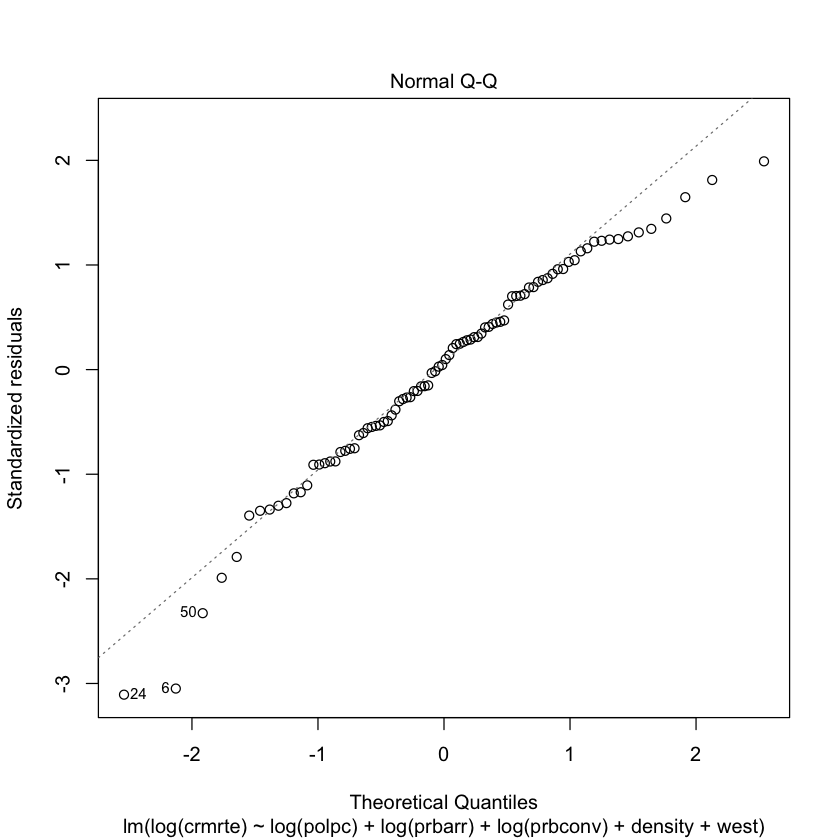

In [59]:
plot(model2, which = 2)

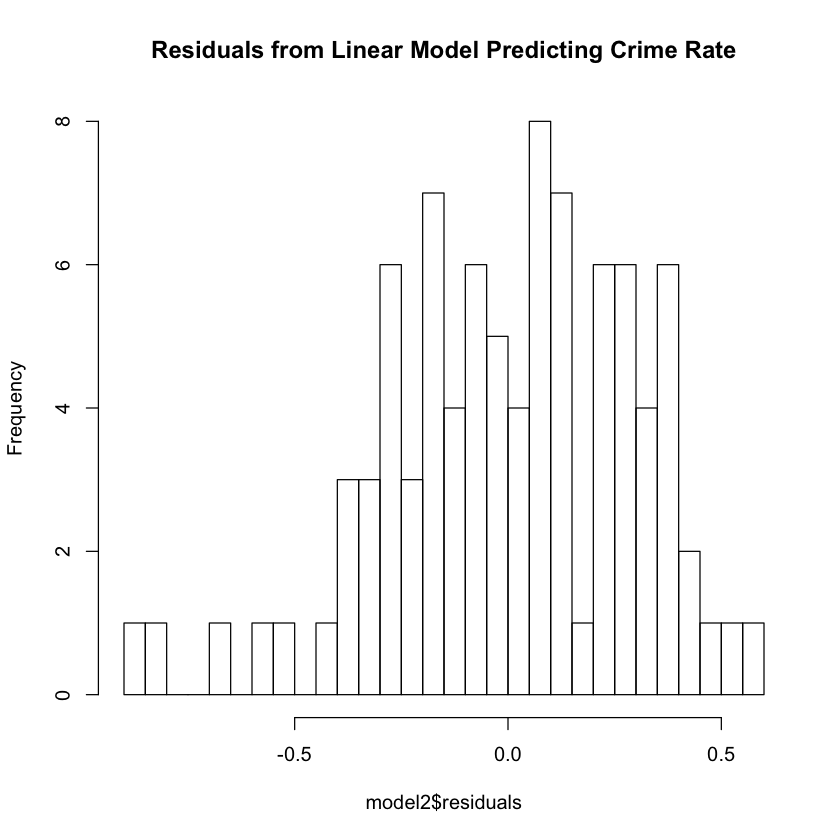

In [60]:
hist(model2$residuals, breaks = 50, main="Residuals from Linear Model Predicting Crime Rate")

Overall, we can see that all six CLM assumptions have been generally satisfied/ addressed. This is important because the assumptions are "checkboxes" for us to go forth and have practical significance that our linear models are fundamentally rooted with valid statistical credibility

## 4. A Regression Table

We use heteroskedasticity-robust standard error to create a regression table for three models to correct for any heteroskedasticity. In our regression table, all three of our model specifications are displayed. Readers can see changes from specification to specification if they scan horizontally on the regression table. The regression table also includes statistically significant information. If there are stars next to the coefficients, the coefficients display some level of statistically significance.

From the regression table shown below, we can see how coefficients changes among different model specification. For instance, "polpc"(police per capita) is statistically significant in model2, while it is not statistically significant in model3. This happens because we only include five important independent variables in model2. But, in model3, we include most of the varibles that can affect crime rate. That means, in model3, "polpc" has higher correlation with additional variables. "Polpc" has higher chance to cause multicollinearity with other variables in model3. As shown in the heat map above, "polpc" is highly correlated with "taxpc" (tax revenue per capita).

In [63]:
se.model1 = coeftest(model1, vcov=vcovHC)[, "Std. Error"]
se.model2 = coeftest(model2, vcov=vcovHC)[, "Std. Error"]
se.model3 = coeftest(model3, vcov=vcovHC)[, "Std. Error"]

print("Regression table for 3 models: ")
stargazer(model1, model2, model3, type= "text", omit.stat = "f", align = TRUE, se = list(se.model1,se.model2,se.model3), star.cutoffs = c(0.05, 0.01, 0.001))


[1] "Regression table for 3 models: "

                                  Dependent variable:              
                    -----------------------------------------------
                        crmrte)               log(crmrte)          
                          (1)             (2)             (3)      
-------------------------------------------------------------------
taxpc                   -0.001                                     
                        (0.005)                                    
                                                                   
density                0.236***                                    
                        (0.033)                                    
                                                                   
log(polpc)                              0.439**          0.427     
                                        (0.145)         (0.238)    
                                                                   
log(prbar

Additionally, we can see the goodness of fit from the adjusted R square. For model 1, it is 0.415. It means 41.5% of variance in outcome variable can be explained by model 1. The adjusted R square for model 2 is 0.693. It means 69.3% of variance can be explained by model 2. And the adjusted R square for model 3 is 0.760. It means 76% of variance can be explained by model 3. Thus, model 3 has the best goodness of fit.

However, independent variables in model 2 all have statistically significant coefficient, while model1 doesn't include enough statistically significant variables and model3 includes too many non-statistically significant variables. Thus, statistically, model 2 is the best of the three. It has good fit of variance and all its variables have statistically significant coefficients.

We use Cohen's f square to test practical significant for each model as below. All the Cohen's f squares are larger than 0.35. All of them have practically significant.

In [62]:
model1_adj_r_square = summary(model1)$adj.r.squared
model2_adj_r_square = summary(model2)$adj.r.squared
model3_adj_r_square = summary(model3)$adj.r.squared

paste("Model 1 Cohen's f square: ", model1_adj_r_square / (1 - model1_adj_r_square))
paste("Model 2 Cohen's f square: ", model2_adj_r_square / (1 - model2_adj_r_square))
paste("Model 3 Cohen's f square: ", model3_adj_r_square / (1 - model3_adj_r_square))

[1] "Model 1 Cohen's f square:  0.730454326270252"

[1] "Model 2 Cohen's f square:  2.25738549768536"

[1] "Model 3 Cohen's f square:  3.16665221408533"

## 5. A Discussion of Omitted Variables


Below we present a handful of potential omitted variables we have identified.

#### #1  - Unemployment Rate

We believe that analyzing unemployment levels for any given county could have correlation to crime rate. Unemployment has different spreads in different places, but a general pattern has been is that areas with more minorities or high density of people has a higher unemployment rate. Though our measurement of this may not be perfect, we can use the percent minority from the 1980s (pctmin80) column, whether the count is "urban" or not, and the "density" column to gauge minority and size of population. A model that combined these factors, we can argue would have an output that would be similar to what a model that contained unemployment rate would output. We predict based on the correlations we see in our given data, that unemployment rate will have a positive effect on crime rate taking it away from zero. The higher the unemployment rate, the higher the crime rate.


#### #2  - Education Levels

Using some metric to measure education level could give us means to compare its relationship to crime rate. Generally more educated people have a better understanding of political, economical, social, and technological progress. We believe this information would empower them to make better decisions, leading them away from crime. Therefore we'd estimate that education levels would have a negative correlation with crime rate.


Usually those with higher levels of education have higher wages/ salaries. Therefore tax per capita (taxpc) is a possible proxy to reflect education level in a given county. A model that is built with this and categoriacal classification based on "region" would help us gain information for where certain areas maybe gentrified or misrepresented. These areas we estimate would have unique relationships with crime rate, and studying this over time would show trends of how crime rate changes given gentrification. Tax and region alone may not be enough, but it is somewhere to start.

#### #3  - Homelessness Levels

Regions or cities that have a high homelessness rates have shown to be more prone to violence, drug and alcohol issues, theft, assault, and a handful more problems. A metric to track these levels could prove in direct positive correlation with crime rate. The higher the homelessness level is, the higher the crime rate. As it is there doesn't seem to be any clear indicator of this in our current data set, we have some data points regarding crime and arrest, but it doesn't necessarily allow us to back track that to assume homelessness was the source. This is some data that we can gather.


#### #4  - Statewide Gun Control Policy


North Carolina is an open carry state without a permit and there is no waiting period to buy guns. More people died from guns in 2016 in NC state than the previous 35 years. The year 2016, 1,400 people die from guns, according to data from the Centers for Disease Control and Prevention. There was also a 27% increase over the previous year with guns involving homicides. Therefore, it is expected that gun ownership will be a crucial variable to the crimte rate regression model. The higher the percentage of gun ownership, the higher the crime rate.


#### #5   - Weather Conditions:

Weather condition will affect crime rate. If there are strong snow storms in some counties or some counties are flooded, people in those counties are more likely to stay at home. Thus, the crime rate will decrease, if weather condition are bad. The proxy variable in this case could be probability of arrest(prbarr), probability of conviction(prbconv), probability of prison sentence(prbpris). Since if more people are staying at home, they are less likely to go outside and commit crimes. Therefore, the bad weather condition is part of the reason why those proxy variables are decreasing. Thus, the correlation between prbarr/prbconv/prbpris and weather condition is larger than 0. As analyzed in model3, we can see the correlation between prbarr/prbconv/prbpris and crmrte is negative. So, the OLS coefficient on prbarr/prbconv/prbpris will be scaled toward zero(less negative) losing statistical significance.

## 6. A Conclusion

We hope that this study has been able to paint a picture of some of the various factors that impacted crime rate in North Carolina. Being cogniscent however that 1987 North Carolina and prsent day North Carolina, or the United States for that matter are very different. Though the learnings from our study, might not be the most pertinent in understanding or taking action on crime rate today, they definitely do provide direction towards where to start. Being able to track the history of these metrics as they peer into the 21st Century will help us account for the evolution of crime in the United States.

With this being said lets look back at some of our findings from our study.

We learned that there is a strong relationship between crime rates and the explanatory variables we used in our model 2. The prob. of arrest, the prob. of conviction, the population density, the police per capita, and whether or not a county was in the west region of North Carolina. We have shown through statistical and practical significance tests, that these factors are relevant to predicting crime rate in North Carolina. Our report presents detailed graphs and explanations but we will summarize some of these factors into directives a political campagin can take to reducing crime rate.

The results of our analysis show that criminal activity is reduced when the prospect of arrest is high. However, it is dangerous to make the causal claim that throwing law enforcement into counties and regions will bring down the crime rate. It will potentially overwhelm police resources, given that police resoruces are fixed in a short term. Also it could lead to complaints from citizens, who all of a sudden may feel over-patrolled or over monitored.

Base on our dataset, it is clear that crime rate increased as the population density raised, especially in urban areas. However, in a higher density city, any given street is less likely to be empty of passersby at any given time. Logically, high traffic areas are generally much safer than low-traffic areas. Given that police presence in urban areas is generally very high, we want to suggest further research into optimization of police patrol in certain area's during specific time periods thoughout the week. We believe that this would make policing overall much more efficient, especially in means of minimizing the number of officers patrolling areas that may not need patrolling. Rather focussing on the "potential" of crime rather than patrolling without a clear understanding.

From the heatmap and previous analysis, we also see that the probability of conviction and crime rate are negatively correlated. Probability of conviction has a statistically significant impact on crime rate, therefore a higher probability of conviction means lower crime rate. The possible reasoning here is that those who are convicted, usually are at a stage where they are facing fines, jailtime, or must go through a disciplinary/ judicial review. This hinders the ability of any individual to commit another crime, and hopefully teaches them to make better choices, therefore reducing crime.

Looking at the flip side of this, we noted that in the western region crime rate was actually lower. By understanding that the correlations that "west" had with various other variables, specifically "pctmin80" we can understand that the minority population percentage went down given that the county was in the western region. We must be careful with the causual claims we make here, but this could imply that the western region is traditionally populated with majority populations. This is simply the tip of the iceberg given we do not have demographic data, this is something for policy makers to look into to see what else helps the west have a lower crime rate and reason whether it is possible to replicate those traits for other counties.

Lastly we take a look at police per capita having a positive correlation with crime rate. Historically, we would think that increasing police numbers would be a quick policy decision to reduce crime. The analysis of our model here tells us quite the opposite. But overall it is fair to say that this is something that policy makers should be put to research and understanding at a deeper scale.Especially because given the data we have studied it is clear that the behavior varies heavilty even by region Accounting for this and the ommitted variables mentioned it is hard to confidently make policy suggestions.

Ultimately, the policy suggestion that we would like to make, is that police patrolling should be made more efficient. This means finding the fine like where we are not saturating regions or counties with high amounts of police units, rather it is efficiently placing them by region and by time of day/week/month. This will allow us to strike an optimal probability of arrest or conviction as neceassary, which has been shown to decrease crime rate. It is a tricky and fine balance, with many other factors also at play. 

In addition we must recoThe number of omitted variables that impact the research study is rather high. Therefore we must proceed with a grain of salt, as we validate the above suggestion for policy development. We also suggest to continue collecting data from 1987 leading up to current day. Diversifying the data points, as well as involving a time series, will provide this study crucial information to make well-informed decisions moving forward. 
